In [21]:
# Import Libraries and Data

import re
import matplotlib.pyplot as plt

# Input data
data = """
Epoch #1: 40320it [02:44, 244.60it/s, env_step=40320, len=23.4, loss=0.023, loss/clip=0.006, loss/ent=0.718, loss/vf=0.037, n/ep=24, n/st=640, rew=0.575]
Epoch #1: test_reward: 0.598200 ± 0.068473, best_reward: 0.598200 ± 0.068473 in #1
Epoch #2: 40320it [02:40, 251.28it/s, env_step=80640, len=24.1, loss=0.007, loss/clip=-0.000, loss/ent=0.624, loss/vf=0.016, n/ep=25, n/st=640, rew=0.633]
Epoch #2: test_reward: 0.528700 ± 0.202770, best_reward: 0.598200 ± 0.068473 in #1
Epoch #3: 40320it [02:38, 254.57it/s, env_step=120960, len=25.0, loss=0.004, loss/clip=-0.003, loss/ent=0.560, loss/vf=0.014, n/ep=15, n/st=640, rew=0.556]
Epoch #3: test_reward: 0.575300 ± 0.131091, best_reward: 0.598200 ± 0.068473 in #1
Epoch #4: 40320it [02:36, 257.83it/s, env_step=161280, len=24.6, loss=0.014, loss/clip=-0.001, loss/ent=0.474, loss/vf=0.032, n/ep=26, n/st=640, rew=0.588]
Epoch #4: test_reward: 0.599000 ± 0.125789, best_reward: 0.599000 ± 0.125789 in #4
Epoch #5: 40320it [02:36, 257.18it/s, env_step=201600, len=25.5, loss=0.005, loss/clip=0.002, loss/ent=0.458, loss/vf=0.009, n/ep=22, n/st=640, rew=0.616]
Epoch #5: test_reward: 0.503400 ± 0.115510, best_reward: 0.599000 ± 0.125789 in #4
Epoch #6: 40320it [02:34, 260.66it/s, env_step=241920, len=26.0, loss=0.000, loss/clip=-0.003, loss/ent=0.500, loss/vf=0.009, n/ep=23, n/st=640, rew=0.618]
Epoch #6: test_reward: 0.575000 ± 0.149396, best_reward: 0.599000 ± 0.125789 in #4
Epoch #7: 40320it [02:31, 266.93it/s, env_step=282240, len=22.2, loss=0.007, loss/clip=-0.001, loss/ent=0.619, loss/vf=0.018, n/ep=31, n/st=640, rew=0.544]
Epoch #7: test_reward: 0.534800 ± 0.087056, best_reward: 0.599000 ± 0.125789 in #4
Epoch #8: 40320it [02:31, 265.49it/s, env_step=322560, len=26.1, loss=0.005, loss/clip=0.001, loss/ent=0.798, loss/vf=0.010, n/ep=19, n/st=640, rew=0.659]
Epoch #8: test_reward: 0.676600 ± 0.088102, best_reward: 0.676600 ± 0.088102 in #8
Epoch #9: 40320it [02:29, 269.07it/s, env_step=362880, len=27.0, loss=0.005, loss/clip=-0.004, loss/ent=0.689, loss/vf=0.019, n/ep=24, n/st=640, rew=0.644]
Epoch #9: test_reward: 0.647900 ± 0.070083, best_reward: 0.676600 ± 0.088102 in #8
Epoch #10: 40320it [02:31, 266.34it/s, env_step=403200, len=27.6, loss=0.005, loss/clip=0.002, loss/ent=0.655, loss/vf=0.009, n/ep=31, n/st=640, rew=0.669]
Epoch #10: test_reward: 0.632000 ± 0.103253, best_reward: 0.676600 ± 0.088102 in #8
Epoch #11: 40320it [02:29, 269.83it/s, env_step=443520, len=26.4, loss=-0.002, loss/clip=-0.003, loss/ent=0.659, loss/vf=0.004, n/ep=19, n/st=640, rew=0.649]
Epoch #11: test_reward: 0.673100 ± 0.047961, best_reward: 0.676600 ± 0.088102 in #8
Epoch #12: 40320it [02:29, 268.95it/s, env_step=483840, len=26.4, loss=0.005, loss/clip=0.002, loss/ent=0.637, loss/vf=0.006, n/ep=22, n/st=640, rew=0.688]
Epoch #12: test_reward: 0.663500 ± 0.089017, best_reward: 0.676600 ± 0.088102 in #8
Epoch #13: 40320it [02:30, 267.96it/s, env_step=524160, len=26.3, loss=0.005, loss/clip=0.001, loss/ent=0.606, loss/vf=0.010, n/ep=29, n/st=640, rew=0.638]
Epoch #13: test_reward: 0.697400 ± 0.065468, best_reward: 0.697400 ± 0.065468 in #13
Epoch #14: 40320it [02:29, 269.09it/s, env_step=564480, len=27.7, loss=0.001, loss/clip=-0.001, loss/ent=0.596, loss/vf=0.005, n/ep=26, n/st=640, rew=0.676]
Epoch #14: test_reward: 0.635700 ± 0.077919, best_reward: 0.697400 ± 0.065468 in #13
Epoch #15: 40320it [02:31, 265.93it/s, env_step=604800, len=25.1, loss=0.001, loss/clip=-0.001, loss/ent=0.582, loss/vf=0.004, n/ep=21, n/st=640, rew=0.666]
Epoch #15: test_reward: 0.664800 ± 0.081951, best_reward: 0.697400 ± 0.065468 in #13
Epoch #16: 40320it [02:34, 261.13it/s, env_step=645120, len=27.7, loss=0.003, loss/clip=0.001, loss/ent=0.594, loss/vf=0.006, n/ep=23, n/st=640, rew=0.686]
Epoch #16: test_reward: 0.650200 ± 0.078735, best_reward: 0.697400 ± 0.065468 in #13
Epoch #17: 40320it [02:33, 261.82it/s, env_step=685440, len=26.4, loss=-0.003, loss/clip=-0.003, loss/ent=0.586, loss/vf=0.003, n/ep=23, n/st=640, rew=0.668]
Epoch #17: test_reward: 0.692300 ± 0.056473, best_reward: 0.697400 ± 0.065468 in #13
Epoch #18: 40320it [02:33, 262.49it/s, env_step=725760, len=28.2, loss=0.000, loss/clip=-0.001, loss/ent=0.572, loss/vf=0.004, n/ep=16, n/st=640, rew=0.636]
Epoch #18: test_reward: 0.686800 ± 0.088311, best_reward: 0.697400 ± 0.065468 in #13
Epoch #19: 40320it [02:37, 256.16it/s, env_step=766080, len=29.3, loss=0.015, loss/clip=0.003, loss/ent=0.532, loss/vf=0.025, n/ep=27, n/st=640, rew=0.664]
Epoch #19: test_reward: 0.704400 ± 0.081159, best_reward: 0.704400 ± 0.081159 in #19
Epoch #20: 40320it [02:46, 241.55it/s, env_step=806400, len=27.3, loss=0.001, loss/clip=-0.002, loss/ent=0.616, loss/vf=0.006, n/ep=29, n/st=640, rew=0.696]
Epoch #20: test_reward: 0.621600 ± 0.101014, best_reward: 0.704400 ± 0.081159 in #19
Epoch #21: 40320it [02:42, 247.46it/s, env_step=846720, len=27.4, loss=0.002, loss/clip=0.001, loss/ent=0.563, loss/vf=0.004, n/ep=23, n/st=640, rew=0.700]
Epoch #21: test_reward: 0.720700 ± 0.078460, best_reward: 0.720700 ± 0.078460 in #21
Epoch #22: 40320it [02:36, 258.14it/s, env_step=887040, len=28.4, loss=-0.003, loss/clip=-0.004, loss/ent=0.583, loss/vf=0.003, n/ep=19, n/st=640, rew=0.676]
Epoch #22: test_reward: 0.677500 ± 0.071201, best_reward: 0.720700 ± 0.078460 in #21
Epoch #23: 40320it [02:36, 257.90it/s, env_step=927360, len=28.7, loss=-0.000, loss/clip=-0.002, loss/ent=0.605, loss/vf=0.005, n/ep=30, n/st=640, rew=0.659]
Epoch #23: test_reward: 0.661400 ± 0.062591, best_reward: 0.720700 ± 0.078460 in #21
Epoch #24: 40320it [02:38, 254.27it/s, env_step=967680, len=26.5, loss=0.002, loss/clip=0.002, loss/ent=0.536, loss/vf=0.003, n/ep=15, n/st=640, rew=0.679]
Epoch #24: test_reward: 0.650000 ± 0.103480, best_reward: 0.720700 ± 0.078460 in #21
Epoch #25: 40320it [02:34, 260.59it/s, env_step=1008000, len=27.5, loss=0.001, loss/clip=0.001, loss/ent=0.618, loss/vf=0.003, n/ep=35, n/st=640, rew=0.646]
Epoch #25: test_reward: 0.698300 ± 0.075934, best_reward: 0.720700 ± 0.078460 in #21
Epoch #26: 40320it [02:34, 260.49it/s, env_step=1048320, len=26.9, loss=-0.004, loss/clip=-0.005, loss/ent=0.468, loss/vf=0.003, n/ep=21, n/st=640, rew=0.684]
Epoch #26: test_reward: 0.708000 ± 0.080659, best_reward: 0.720700 ± 0.078460 in #21
Epoch #27: 40320it [02:35, 259.22it/s, env_step=1088640, len=26.3, loss=0.001, loss/clip=-0.000, loss/ent=0.506, loss/vf=0.004, n/ep=20, n/st=640, rew=0.686]
Epoch #27: test_reward: 0.677400 ± 0.053427, best_reward: 0.720700 ± 0.078460 in #21
Epoch #28: 40320it [02:35, 259.90it/s, env_step=1128960, len=30.0, loss=0.001, loss/clip=0.000, loss/ent=0.487, loss/vf=0.002, n/ep=20, n/st=640, rew=0.710]
Epoch #28: test_reward: 0.699700 ± 0.088002, best_reward: 0.720700 ± 0.078460 in #21
Epoch #29: 40320it [02:37, 255.76it/s, env_step=1169280, len=27.6, loss=0.006, loss/clip=0.004, loss/ent=0.346, loss/vf=0.005, n/ep=27, n/st=640, rew=0.666]
Epoch #29: test_reward: 0.646700 ± 0.081543, best_reward: 0.720700 ± 0.078460 in #21
Epoch #30: 40320it [02:29, 269.04it/s, env_step=1209600, len=24.9, loss=0.003, loss/clip=0.001, loss/ent=0.377, loss/vf=0.004, n/ep=34, n/st=640, rew=0.621]
Epoch #30: test_reward: 0.645200 ± 0.117903, best_reward: 0.720700 ± 0.078460 in #21
Epoch #31: 40320it [02:34, 260.59it/s, env_step=1249920, len=27.8, loss=0.000, loss/clip=-0.003, loss/ent=0.471, loss/vf=0.007, n/ep=24, n/st=640, rew=0.670]
Epoch #31: test_reward: 0.676000 ± 0.070318, best_reward: 0.720700 ± 0.078460 in #21
Epoch #32: 40320it [02:47, 241.27it/s, env_step=1290240, len=27.9, loss=-0.001, loss/clip=-0.002, loss/ent=0.464, loss/vf=0.003, n/ep=25, n/st=640, rew=0.676]
Epoch #32: test_reward: 0.663000 ± 0.130318, best_reward: 0.720700 ± 0.078460 in #21
Epoch #33: 40320it [02:47, 241.38it/s, env_step=1330560, len=27.4, loss=0.001, loss/clip=0.000, loss/ent=0.475, loss/vf=0.003, n/ep=20, n/st=640, rew=0.680]
Epoch #33: test_reward: 0.625400 ± 0.082965, best_reward: 0.720700 ± 0.078460 in #21
Epoch #34: 40320it [02:44, 244.67it/s, env_step=1370880, len=26.2, loss=0.005, loss/clip=0.004, loss/ent=0.443, loss/vf=0.003, n/ep=24, n/st=640, rew=0.667]
Epoch #34: test_reward: 0.646700 ± 0.048613, best_reward: 0.720700 ± 0.078460 in #21
Epoch #35: 40320it [02:43, 246.46it/s, env_step=1411200, len=26.5, loss=0.004, loss/clip=0.002, loss/ent=0.469, loss/vf=0.005, n/ep=29, n/st=640, rew=0.661]
Epoch #35: test_reward: 0.658600 ± 0.133510, best_reward: 0.720700 ± 0.078460 in #21
Epoch #36: 40320it [02:45, 244.22it/s, env_step=1451520, len=28.3, loss=-0.000, loss/clip=-0.001, loss/ent=0.399, loss/vf=0.002, n/ep=19, n/st=640, rew=0.675]
Epoch #36: test_reward: 0.704100 ± 0.079376, best_reward: 0.720700 ± 0.078460 in #21
Epoch #37: 40320it [02:42, 248.81it/s, env_step=1491840, len=26.2, loss=0.000, loss/clip=-0.000, loss/ent=0.367, loss/vf=0.003, n/ep=19, n/st=640, rew=0.603]
Epoch #37: test_reward: 0.646800 ± 0.073832, best_reward: 0.720700 ± 0.078460 in #21
Epoch #38: 40320it [02:41, 248.97it/s, env_step=1532160, len=26.5, loss=-0.002, loss/clip=-0.002, loss/ent=0.405, loss/vf=0.002, n/ep=26, n/st=640, rew=0.660]
Epoch #38: test_reward: 0.702900 ± 0.091910, best_reward: 0.720700 ± 0.078460 in #21
Epoch #39: 40320it [02:39, 252.18it/s, env_step=1572480, len=28.4, loss=0.002, loss/clip=0.001, loss/ent=0.440, loss/vf=0.002, n/ep=22, n/st=640, rew=0.688]
Epoch #39: test_reward: 0.695200 ± 0.085277, best_reward: 0.720700 ± 0.078460 in #21
Epoch #40: 40320it [02:39, 252.77it/s, env_step=1612800, len=26.8, loss=0.002, loss/clip=0.001, loss/ent=0.424, loss/vf=0.002, n/ep=28, n/st=640, rew=0.675]
Epoch #40: test_reward: 0.702500 ± 0.082374, best_reward: 0.720700 ± 0.078460 in #21
Epoch #41: 40320it [02:39, 252.11it/s, env_step=1653120, len=27.4, loss=-0.001, loss/clip=-0.002, loss/ent=0.442, loss/vf=0.003, n/ep=22, n/st=640, rew=0.691]
Epoch #41: test_reward: 0.698600 ± 0.100957, best_reward: 0.720700 ± 0.078460 in #21
Epoch #42: 40320it [02:42, 248.79it/s, env_step=1693440, len=27.4, loss=0.003, loss/clip=0.001, loss/ent=0.465, loss/vf=0.004, n/ep=25, n/st=640, rew=0.660]
Epoch #42: test_reward: 0.726000 ± 0.091829, best_reward: 0.726000 ± 0.091829 in #42
Epoch #43: 40320it [02:40, 251.19it/s, env_step=1733760, len=27.4, loss=0.002, loss/clip=0.002, loss/ent=0.426, loss/vf=0.002, n/ep=25, n/st=640, rew=0.696]
Epoch #43: test_reward: 0.681800 ± 0.085291, best_reward: 0.726000 ± 0.091829 in #42
Epoch #44: 40320it [02:44, 244.76it/s, env_step=1774080, len=28.8, loss=0.000, loss/clip=-0.000, loss/ent=0.477, loss/vf=0.002, n/ep=16, n/st=640, rew=0.700]
Epoch #44: test_reward: 0.654700 ± 0.084107, best_reward: 0.726000 ± 0.091829 in #42
Epoch #45: 40320it [02:41, 249.59it/s, env_step=1814400, len=23.8, loss=0.003, loss/clip=0.002, loss/ent=0.392, loss/vf=0.003, n/ep=20, n/st=640, rew=0.632]
Epoch #45: test_reward: 0.619100 ± 0.138372, best_reward: 0.726000 ± 0.091829 in #42
Epoch #46: 40320it [02:48, 239.64it/s, env_step=1854720, len=28.9, loss=-0.000, loss/clip=-0.001, loss/ent=0.424, loss/vf=0.002, n/ep=26, n/st=640, rew=0.694]
Epoch #46: test_reward: 0.722500 ± 0.081278, best_reward: 0.726000 ± 0.091829 in #42
Epoch #47: 40320it [02:43, 246.37it/s, env_step=1895040, len=27.3, loss=0.002, loss/clip=0.002, loss/ent=0.387, loss/vf=0.002, n/ep=32, n/st=640, rew=0.706]
Epoch #47: test_reward: 0.674500 ± 0.073778, best_reward: 0.726000 ± 0.091829 in #42
Epoch #48: 40320it [02:41, 249.52it/s, env_step=1935360, len=29.0, loss=0.005, loss/clip=0.004, loss/ent=0.445, loss/vf=0.002, n/ep=23, n/st=640, rew=0.702]
Epoch #48: test_reward: 0.698000 ± 0.056461, best_reward: 0.726000 ± 0.091829 in #42
Epoch #49: 40320it [02:40, 251.14it/s, env_step=1975680, len=25.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.397, loss/vf=0.002, n/ep=30, n/st=640, rew=0.673]
Epoch #49: test_reward: 0.661900 ± 0.092285, best_reward: 0.726000 ± 0.091829 in #42
Epoch #50: 40320it [02:45, 243.80it/s, env_step=2016000, len=26.5, loss=0.000, loss/clip=-0.000, loss/ent=0.455, loss/vf=0.002, n/ep=24, n/st=640, rew=0.677]
Epoch #50: test_reward: 0.637800 ± 0.093466, best_reward: 0.726000 ± 0.091829 in #42
Epoch #51: 40320it [02:42, 248.09it/s, env_step=2056320, len=28.2, loss=0.000, loss/clip=-0.000, loss/ent=0.444, loss/vf=0.002, n/ep=23, n/st=640, rew=0.688]
Epoch #51: test_reward: 0.642900 ± 0.062399, best_reward: 0.726000 ± 0.091829 in #42
Epoch #52: 40320it [02:40, 251.64it/s, env_step=2096640, len=27.0, loss=0.003, loss/clip=0.003, loss/ent=0.433, loss/vf=0.002, n/ep=28, n/st=640, rew=0.696]
Epoch #52: test_reward: 0.703200 ± 0.067240, best_reward: 0.726000 ± 0.091829 in #42
Epoch #53: 40320it [02:40, 250.57it/s, env_step=2136960, len=25.0, loss=0.000, loss/clip=-0.000, loss/ent=0.422, loss/vf=0.002, n/ep=14, n/st=640, rew=0.668]
Epoch #53: test_reward: 0.641900 ± 0.070468, best_reward: 0.726000 ± 0.091829 in #42
Epoch #54: 40320it [02:38, 254.79it/s, env_step=2177280, len=26.8, loss=0.005, loss/clip=0.004, loss/ent=0.389, loss/vf=0.002, n/ep=20, n/st=640, rew=0.676]
Epoch #54: test_reward: 0.682400 ± 0.124614, best_reward: 0.726000 ± 0.091829 in #42
Epoch #55: 40320it [02:37, 255.38it/s, env_step=2217600, len=29.4, loss=-0.000, loss/clip=-0.001, loss/ent=0.371, loss/vf=0.001, n/ep=17, n/st=640, rew=0.718]
Epoch #55: test_reward: 0.686600 ± 0.093348, best_reward: 0.726000 ± 0.091829 in #42
Epoch #56: 40320it [02:36, 257.57it/s, env_step=2257920, len=27.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.409, loss/vf=0.001, n/ep=19, n/st=640, rew=0.702]
Epoch #56: test_reward: 0.696900 ± 0.079178, best_reward: 0.726000 ± 0.091829 in #42
Epoch #57: 40320it [02:40, 250.88it/s, env_step=2298240, len=28.0, loss=0.003, loss/clip=0.002, loss/ent=0.442, loss/vf=0.003, n/ep=27, n/st=640, rew=0.678]
Epoch #57: test_reward: 0.616500 ± 0.144231, best_reward: 0.726000 ± 0.091829 in #42
Epoch #58: 40320it [02:39, 253.38it/s, env_step=2338560, len=25.2, loss=0.000, loss/clip=-0.000, loss/ent=0.479, loss/vf=0.001, n/ep=22, n/st=640, rew=0.646]
Epoch #58: test_reward: 0.675700 ± 0.093388, best_reward: 0.726000 ± 0.091829 in #42
Epoch #59: 40320it [02:37, 256.09it/s, env_step=2378880, len=28.0, loss=0.002, loss/clip=0.001, loss/ent=0.463, loss/vf=0.003, n/ep=21, n/st=640, rew=0.651]
Epoch #59: test_reward: 0.686100 ± 0.089419, best_reward: 0.726000 ± 0.091829 in #42
Epoch #60: 40320it [02:38, 255.16it/s, env_step=2419200, len=28.0, loss=0.001, loss/clip=0.000, loss/ent=0.453, loss/vf=0.002, n/ep=31, n/st=640, rew=0.686]
Epoch #60: test_reward: 0.739300 ± 0.065622, best_reward: 0.739300 ± 0.065622 in #60
Epoch #61: 40320it [02:38, 254.10it/s, env_step=2459520, len=27.6, loss=-0.000, loss/clip=-0.001, loss/ent=0.450, loss/vf=0.002, n/ep=22, n/st=640, rew=0.681]
Epoch #61: test_reward: 0.625500 ± 0.105131, best_reward: 0.739300 ± 0.065622 in #60
Epoch #62: 40320it [02:34, 261.56it/s, env_step=2499840, len=27.6, loss=0.001, loss/clip=0.001, loss/ent=0.423, loss/vf=0.001, n/ep=20, n/st=640, rew=0.669]
Epoch #62: test_reward: 0.675700 ± 0.071075, best_reward: 0.739300 ± 0.065622 in #60
Epoch #63: 40320it [02:42, 248.18it/s, env_step=2540160, len=28.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.389, loss/vf=0.002, n/ep=23, n/st=640, rew=0.669]
Epoch #63: test_reward: 0.725400 ± 0.033995, best_reward: 0.739300 ± 0.065622 in #60
Epoch #64: 40320it [02:43, 247.09it/s, env_step=2580480, len=26.7, loss=-0.001, loss/clip=-0.002, loss/ent=0.390, loss/vf=0.002, n/ep=15, n/st=640, rew=0.663]
Epoch #64: test_reward: 0.645600 ± 0.090166, best_reward: 0.739300 ± 0.065622 in #60
Epoch #65: 40320it [02:37, 256.04it/s, env_step=2620800, len=24.6, loss=0.000, loss/clip=-0.000, loss/ent=0.360, loss/vf=0.002, n/ep=19, n/st=640, rew=0.640]
Epoch #65: test_reward: 0.679100 ± 0.063706, best_reward: 0.739300 ± 0.065622 in #60
Epoch #66: 40320it [02:37, 256.27it/s, env_step=2661120, len=27.2, loss=0.000, loss/clip=-0.000, loss/ent=0.341, loss/vf=0.001, n/ep=28, n/st=640, rew=0.671]
Epoch #66: test_reward: 0.696500 ± 0.075078, best_reward: 0.739300 ± 0.065622 in #60
Epoch #67: 40320it [02:28, 270.67it/s, env_step=2701440, len=27.7, loss=-0.018, loss/clip=-0.019, loss/ent=0.367, loss/vf=0.003, n/ep=27, n/st=640, rew=0.685]
Epoch #67: test_reward: 0.658000 ± 0.058267, best_reward: 0.739300 ± 0.065622 in #60
Epoch #68: 40320it [02:27, 272.95it/s, env_step=2741760, len=27.4, loss=0.000, loss/clip=0.000, loss/ent=0.375, loss/vf=0.001, n/ep=28, n/st=640, rew=0.690]
Epoch #68: test_reward: 0.683700 ± 0.106477, best_reward: 0.739300 ± 0.065622 in #60
Epoch #69: 40320it [02:30, 268.08it/s, env_step=2782080, len=25.9, loss=0.026, loss/clip=0.023, loss/ent=0.372, loss/vf=0.007, n/ep=19, n/st=640, rew=0.643]
Epoch #69: test_reward: 0.660700 ± 0.096131, best_reward: 0.739300 ± 0.065622 in #60
Epoch #70: 40320it [02:28, 271.14it/s, env_step=2822400, len=29.1, loss=-0.002, loss/clip=-0.002, loss/ent=0.413, loss/vf=0.001, n/ep=27, n/st=640, rew=0.662]
Epoch #70: test_reward: 0.685900 ± 0.065808, best_reward: 0.739300 ± 0.065622 in #60
Epoch #71: 40320it [02:39, 253.24it/s, env_step=2862720, len=26.0, loss=0.009, loss/clip=0.007, loss/ent=0.434, loss/vf=0.005, n/ep=21, n/st=640, rew=0.635]
Epoch #71: test_reward: 0.656000 ± 0.113012, best_reward: 0.739300 ± 0.065622 in #60
Epoch #72: 40320it [02:39, 252.79it/s, env_step=2903040, len=28.9, loss=0.000, loss/clip=-0.000, loss/ent=0.373, loss/vf=0.001, n/ep=18, n/st=640, rew=0.693]
Epoch #72: test_reward: 0.645200 ± 0.066326, best_reward: 0.739300 ± 0.065622 in #60
Epoch #73: 40320it [02:39, 252.44it/s, env_step=2943360, len=24.9, loss=-0.009, loss/clip=-0.009, loss/ent=0.426, loss/vf=0.001, n/ep=22, n/st=640, rew=0.686]
Epoch #73: test_reward: 0.680700 ± 0.076495, best_reward: 0.739300 ± 0.065622 in #60
Epoch #74: 40320it [02:36, 258.11it/s, env_step=2983680, len=27.7, loss=-0.002, loss/clip=-0.003, loss/ent=0.443, loss/vf=0.001, n/ep=33, n/st=640, rew=0.681]
Epoch #74: test_reward: 0.673600 ± 0.099875, best_reward: 0.739300 ± 0.065622 in #60
Epoch #75: 40320it [02:35, 259.41it/s, env_step=3024000, len=26.9, loss=0.001, loss/clip=0.001, loss/ent=0.417, loss/vf=0.002, n/ep=31, n/st=640, rew=0.667]
Epoch #75: test_reward: 0.682700 ± 0.042683, best_reward: 0.739300 ± 0.065622 in #60
Epoch #76: 40320it [02:35, 258.85it/s, env_step=3064320, len=27.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.423, loss/vf=0.002, n/ep=20, n/st=640, rew=0.664]
Epoch #76: test_reward: 0.698400 ± 0.091419, best_reward: 0.739300 ± 0.065622 in #60
Epoch #77: 40320it [02:34, 261.38it/s, env_step=3104640, len=25.4, loss=-0.007, loss/clip=-0.007, loss/ent=0.450, loss/vf=0.001, n/ep=29, n/st=640, rew=0.635]
Epoch #77: test_reward: 0.697200 ± 0.083166, best_reward: 0.739300 ± 0.065622 in #60
Epoch #78: 40320it [02:28, 270.93it/s, env_step=3144960, len=26.4, loss=-0.003, loss/clip=-0.003, loss/ent=0.377, loss/vf=0.001, n/ep=18, n/st=640, rew=0.677]
Epoch #78: test_reward: 0.715300 ± 0.067624, best_reward: 0.739300 ± 0.065622 in #60
Epoch #79: 40320it [02:35, 259.27it/s, env_step=3185280, len=27.5, loss=0.002, loss/clip=0.000, loss/ent=0.416, loss/vf=0.003, n/ep=22, n/st=640, rew=0.694]
Epoch #79: test_reward: 0.671700 ± 0.077275, best_reward: 0.739300 ± 0.065622 in #60
Epoch #80: 40320it [02:35, 259.41it/s, env_step=3225600, len=26.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.415, loss/vf=0.001, n/ep=24, n/st=640, rew=0.649]
Epoch #80: test_reward: 0.680300 ± 0.079197, best_reward: 0.739300 ± 0.065622 in #60
Epoch #81: 40320it [02:40, 251.81it/s, env_step=3265920, len=28.3, loss=0.011, loss/clip=0.011, loss/ent=0.380, loss/vf=0.002, n/ep=19, n/st=640, rew=0.676]
Epoch #81: test_reward: 0.676300 ± 0.058351, best_reward: 0.739300 ± 0.065622 in #60
Epoch #82: 40320it [02:30, 267.09it/s, env_step=3306240, len=25.8, loss=0.003, loss/clip=0.003, loss/ent=0.535, loss/vf=0.002, n/ep=14, n/st=640, rew=0.686]
Epoch #82: test_reward: 0.686900 ± 0.100179, best_reward: 0.739300 ± 0.065622 in #60
Epoch #83: 40320it [02:40, 251.88it/s, env_step=3346560, len=26.5, loss=-0.006, loss/clip=-0.006, loss/ent=0.490, loss/vf=0.001, n/ep=25, n/st=640, rew=0.654]
Epoch #83: test_reward: 0.655400 ± 0.060288, best_reward: 0.739300 ± 0.065622 in #60
Epoch #84: 40320it [02:36, 257.90it/s, env_step=3386880, len=26.5, loss=0.005, loss/clip=0.004, loss/ent=0.524, loss/vf=0.001, n/ep=33, n/st=640, rew=0.677]
Epoch #84: test_reward: 0.641300 ± 0.091580, best_reward: 0.739300 ± 0.065622 in #60
Epoch #85: 40320it [02:31, 266.21it/s, env_step=3427200, len=27.7, loss=0.002, loss/clip=0.002, loss/ent=0.488, loss/vf=0.002, n/ep=26, n/st=640, rew=0.674]
Epoch #85: test_reward: 0.683000 ± 0.083125, best_reward: 0.739300 ± 0.065622 in #60
Epoch #86: 40320it [02:35, 259.36it/s, env_step=3467520, len=27.5, loss=0.005, loss/clip=0.004, loss/ent=0.495, loss/vf=0.002, n/ep=30, n/st=640, rew=0.694]
Epoch #86: test_reward: 0.659500 ± 0.091177, best_reward: 0.739300 ± 0.065622 in #60
Epoch #87: 40320it [02:35, 259.52it/s, env_step=3507840, len=28.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.429, loss/vf=0.001, n/ep=26, n/st=640, rew=0.692]
Epoch #87: test_reward: 0.721400 ± 0.064240, best_reward: 0.739300 ± 0.065622 in #60
Epoch #88: 40320it [02:38, 254.16it/s, env_step=3548160, len=26.7, loss=0.001, loss/clip=0.001, loss/ent=0.483, loss/vf=0.002, n/ep=27, n/st=640, rew=0.652]
Epoch #88: test_reward: 0.663600 ± 0.065482, best_reward: 0.739300 ± 0.065622 in #60
Epoch #89: 40320it [02:37, 256.56it/s, env_step=3588480, len=27.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.486, loss/vf=0.001, n/ep=27, n/st=640, rew=0.670]
Epoch #89: test_reward: 0.666900 ± 0.058374, best_reward: 0.739300 ± 0.065622 in #60
Epoch #90: 40320it [02:33, 263.07it/s, env_step=3628800, len=27.7, loss=0.008, loss/clip=0.008, loss/ent=0.459, loss/vf=0.001, n/ep=26, n/st=640, rew=0.682]
Epoch #90: test_reward: 0.734100 ± 0.058709, best_reward: 0.739300 ± 0.065622 in #60
Epoch #91: 40320it [02:33, 262.51it/s, env_step=3669120, len=25.2, loss=-0.003, loss/clip=-0.003, loss/ent=0.468, loss/vf=0.001, n/ep=22, n/st=640, rew=0.674]
Epoch #91: test_reward: 0.601800 ± 0.105948, best_reward: 0.739300 ± 0.065622 in #60
Epoch #92: 40320it [02:35, 259.24it/s, env_step=3709440, len=25.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.457, loss/vf=0.002, n/ep=27, n/st=640, rew=0.667]
Epoch #92: test_reward: 0.681700 ± 0.092541, best_reward: 0.739300 ± 0.065622 in #60
Epoch #93: 40320it [02:39, 252.97it/s, env_step=3749760, len=27.7, loss=0.005, loss/clip=0.004, loss/ent=0.558, loss/vf=0.002, n/ep=26, n/st=640, rew=0.664]
Epoch #93: test_reward: 0.695100 ± 0.075543, best_reward: 0.739300 ± 0.065622 in #60
Epoch #94: 40320it [02:41, 249.35it/s, env_step=3790080, len=31.4, loss=0.001, loss/clip=0.001, loss/ent=0.525, loss/vf=0.001, n/ep=19, n/st=640, rew=0.719]
Epoch #94: test_reward: 0.651200 ± 0.057635, best_reward: 0.739300 ± 0.065622 in #60
Epoch #95: 40320it [02:40, 251.44it/s, env_step=3830400, len=25.6, loss=0.003, loss/clip=0.003, loss/ent=0.489, loss/vf=0.002, n/ep=25, n/st=640, rew=0.668]
Epoch #95: test_reward: 0.664700 ± 0.066885, best_reward: 0.739300 ± 0.065622 in #60
Epoch #96: 40320it [02:34, 260.81it/s, env_step=3870720, len=25.9, loss=-0.000, loss/clip=-0.001, loss/ent=0.509, loss/vf=0.001, n/ep=20, n/st=640, rew=0.652]
Epoch #96: test_reward: 0.649900 ± 0.095159, best_reward: 0.739300 ± 0.065622 in #60
Epoch #97: 40320it [02:35, 259.53it/s, env_step=3911040, len=25.3, loss=0.004, loss/clip=0.003, loss/ent=0.495, loss/vf=0.002, n/ep=26, n/st=640, rew=0.657]
Epoch #97: test_reward: 0.668300 ± 0.094931, best_reward: 0.739300 ± 0.065622 in #60
Epoch #98: 40320it [02:35, 259.31it/s, env_step=3951360, len=26.5, loss=-0.007, loss/clip=-0.007, loss/ent=0.492, loss/vf=0.001, n/ep=22, n/st=640, rew=0.673]
Epoch #98: test_reward: 0.682500 ± 0.084338, best_reward: 0.739300 ± 0.065622 in #60
Epoch #99: 40320it [02:34, 260.98it/s, env_step=3991680, len=25.3, loss=0.000, loss/clip=0.000, loss/ent=0.450, loss/vf=0.001, n/ep=18, n/st=640, rew=0.663]
Epoch #99: test_reward: 0.679300 ± 0.085793, best_reward: 0.739300 ± 0.065622 in #60
Epoch #100: 40320it [02:33, 262.29it/s, env_step=4032000, len=28.4, loss=0.003, loss/clip=0.003, loss/ent=0.454, loss/vf=0.001, n/ep=27, n/st=640, rew=0.679]
Epoch #100: test_reward: 0.702200 ± 0.063922, best_reward: 0.739300 ± 0.065622 in #60
Epoch #101: 40320it [02:37, 255.83it/s, env_step=4072320, len=26.6, loss=-0.009, loss/clip=-0.009, loss/ent=0.453, loss/vf=0.001, n/ep=32, n/st=640, rew=0.679]
Epoch #101: test_reward: 0.687700 ± 0.068032, best_reward: 0.739300 ± 0.065622 in #60
Epoch #102: 40320it [02:39, 253.51it/s, env_step=4112640, len=27.2, loss=0.006, loss/clip=0.006, loss/ent=0.562, loss/vf=0.002, n/ep=24, n/st=640, rew=0.676]
Epoch #102: test_reward: 0.667500 ± 0.083679, best_reward: 0.739300 ± 0.065622 in #60
Epoch #103: 40320it [02:36, 257.68it/s, env_step=4152960, len=26.5, loss=-0.003, loss/clip=-0.003, loss/ent=0.566, loss/vf=0.001, n/ep=22, n/st=640, rew=0.681]
Epoch #103: test_reward: 0.657600 ± 0.085441, best_reward: 0.739300 ± 0.065622 in #60
Epoch #104: 40320it [02:35, 259.45it/s, env_step=4193280, len=26.7, loss=-0.006, loss/clip=-0.007, loss/ent=0.480, loss/vf=0.001, n/ep=20, n/st=640, rew=0.659]
Epoch #104: test_reward: 0.690900 ± 0.078566, best_reward: 0.739300 ± 0.065622 in #60
Epoch #105: 40320it [02:31, 266.98it/s, env_step=4233600, len=28.7, loss=0.000, loss/clip=0.000, loss/ent=0.518, loss/vf=0.001, n/ep=22, n/st=640, rew=0.685]
Epoch #105: test_reward: 0.652200 ± 0.112466, best_reward: 0.739300 ± 0.065622 in #60
Epoch #106: 40320it [02:36, 256.99it/s, env_step=4273920, len=25.1, loss=0.000, loss/clip=0.000, loss/ent=0.412, loss/vf=0.001, n/ep=19, n/st=640, rew=0.678]
Epoch #106: test_reward: 0.751200 ± 0.055479, best_reward: 0.751200 ± 0.055479 in #106
Epoch #107: 40320it [02:35, 259.47it/s, env_step=4314240, len=28.6, loss=-0.004, loss/clip=-0.004, loss/ent=0.482, loss/vf=0.001, n/ep=17, n/st=640, rew=0.691]
Epoch #107: test_reward: 0.673500 ± 0.056550, best_reward: 0.751200 ± 0.055479 in #106
Epoch #108: 40320it [02:32, 263.54it/s, env_step=4354560, len=27.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.542, loss/vf=0.001, n/ep=29, n/st=640, rew=0.667]
Epoch #108: test_reward: 0.722600 ± 0.073103, best_reward: 0.751200 ± 0.055479 in #106
Epoch #109: 40320it [02:31, 265.38it/s, env_step=4394880, len=28.0, loss=-0.004, loss/clip=-0.004, loss/ent=0.450, loss/vf=0.001, n/ep=27, n/st=640, rew=0.684]
Epoch #109: test_reward: 0.696000 ± 0.087653, best_reward: 0.751200 ± 0.055479 in #106
Epoch #110: 40320it [02:34, 261.19it/s, env_step=4435200, len=27.0, loss=0.001, loss/clip=0.001, loss/ent=0.481, loss/vf=0.001, n/ep=31, n/st=640, rew=0.690]
Epoch #110: test_reward: 0.680100 ± 0.070178, best_reward: 0.751200 ± 0.055479 in #106
Epoch #111: 40320it [02:32, 264.12it/s, env_step=4475520, len=29.3, loss=-0.002, loss/clip=-0.002, loss/ent=0.459, loss/vf=0.001, n/ep=26, n/st=640, rew=0.690]
Epoch #111: test_reward: 0.735400 ± 0.054043, best_reward: 0.751200 ± 0.055479 in #106
Epoch #112: 40320it [02:36, 258.27it/s, env_step=4515840, len=26.8, loss=-0.002, loss/clip=-0.002, loss/ent=0.468, loss/vf=0.001, n/ep=21, n/st=640, rew=0.698]
Epoch #112: test_reward: 0.654600 ± 0.065437, best_reward: 0.751200 ± 0.055479 in #106
Epoch #113: 40320it [02:31, 265.96it/s, env_step=4556160, len=28.1, loss=0.000, loss/clip=-0.000, loss/ent=0.453, loss/vf=0.001, n/ep=31, n/st=640, rew=0.709]
Epoch #113: test_reward: 0.689900 ± 0.066042, best_reward: 0.751200 ± 0.055479 in #106
Epoch #114: 40320it [02:34, 261.70it/s, env_step=4596480, len=28.6, loss=-0.002, loss/clip=-0.002, loss/ent=0.446, loss/vf=0.001, n/ep=27, n/st=640, rew=0.699]
Epoch #114: test_reward: 0.680000 ± 0.124011, best_reward: 0.751200 ± 0.055479 in #106
Epoch #115: 40320it [02:34, 260.75it/s, env_step=4636800, len=28.4, loss=0.000, loss/clip=0.000, loss/ent=0.567, loss/vf=0.001, n/ep=27, n/st=640, rew=0.688]
Epoch #115: test_reward: 0.681000 ± 0.067034, best_reward: 0.751200 ± 0.055479 in #106
Epoch #116: 40320it [02:37, 255.75it/s, env_step=4677120, len=25.4, loss=-0.003, loss/clip=-0.003, loss/ent=0.508, loss/vf=0.001, n/ep=23, n/st=640, rew=0.660]
Epoch #116: test_reward: 0.695000 ± 0.089966, best_reward: 0.751200 ± 0.055479 in #106
Epoch #117: 40320it [02:39, 253.42it/s, env_step=4717440, len=27.8, loss=0.002, loss/clip=0.002, loss/ent=0.508, loss/vf=0.001, n/ep=19, n/st=640, rew=0.714]
Epoch #117: test_reward: 0.666800 ± 0.097723, best_reward: 0.751200 ± 0.055479 in #106
Epoch #118: 40320it [02:34, 261.11it/s, env_step=4757760, len=28.8, loss=0.006, loss/clip=0.006, loss/ent=0.486, loss/vf=0.001, n/ep=32, n/st=640, rew=0.710]
Epoch #118: test_reward: 0.714000 ± 0.086930, best_reward: 0.751200 ± 0.055479 in #106
Epoch #119: 40320it [02:35, 259.00it/s, env_step=4798080, len=28.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.517, loss/vf=0.001, n/ep=25, n/st=640, rew=0.687]
Epoch #119: test_reward: 0.697100 ± 0.092913, best_reward: 0.751200 ± 0.055479 in #106
Epoch #120: 40320it [02:36, 257.37it/s, env_step=4838400, len=29.7, loss=-0.003, loss/clip=-0.003, loss/ent=0.523, loss/vf=0.001, n/ep=22, n/st=640, rew=0.720]
Epoch #120: test_reward: 0.721700 ± 0.074034, best_reward: 0.751200 ± 0.055479 in #106
Epoch #121: 40320it [02:34, 260.67it/s, env_step=4878720, len=26.6, loss=-0.002, loss/clip=-0.002, loss/ent=0.495, loss/vf=0.001, n/ep=27, n/st=640, rew=0.680]
Epoch #121: test_reward: 0.713000 ± 0.060000, best_reward: 0.751200 ± 0.055479 in #106
Epoch #122: 40320it [02:35, 259.56it/s, env_step=4919040, len=28.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.478, loss/vf=0.001, n/ep=24, n/st=640, rew=0.706]
Epoch #122: test_reward: 0.674600 ± 0.083732, best_reward: 0.751200 ± 0.055479 in #106
Epoch #123: 40320it [02:36, 257.41it/s, env_step=4959360, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.511, loss/vf=0.001, n/ep=24, n/st=640, rew=0.691]
Epoch #123: test_reward: 0.685100 ± 0.059384, best_reward: 0.751200 ± 0.055479 in #106
Epoch #124: 40320it [02:38, 254.92it/s, env_step=4999680, len=28.4, loss=0.002, loss/clip=0.002, loss/ent=0.470, loss/vf=0.001, n/ep=24, n/st=640, rew=0.668]
Epoch #124: test_reward: 0.684600 ± 0.077065, best_reward: 0.751200 ± 0.055479 in #106
Epoch #125: 40320it [02:38, 253.74it/s, env_step=5040000, len=29.0, loss=0.002, loss/clip=0.002, loss/ent=0.494, loss/vf=0.001, n/ep=14, n/st=640, rew=0.706]
Epoch #125: test_reward: 0.746900 ± 0.099542, best_reward: 0.751200 ± 0.055479 in #106
Epoch #126: 40320it [02:35, 258.92it/s, env_step=5080320, len=26.7, loss=0.001, loss/clip=0.001, loss/ent=0.464, loss/vf=0.001, n/ep=15, n/st=640, rew=0.653]
Epoch #126: test_reward: 0.683600 ± 0.072632, best_reward: 0.751200 ± 0.055479 in #106
Epoch #127: 40320it [02:37, 255.39it/s, env_step=5120640, len=28.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.539, loss/vf=0.001, n/ep=26, n/st=640, rew=0.708]
Epoch #127: test_reward: 0.696600 ± 0.092711, best_reward: 0.751200 ± 0.055479 in #106
Epoch #128: 40320it [02:34, 261.42it/s, env_step=5160960, len=26.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.544, loss/vf=0.001, n/ep=15, n/st=640, rew=0.674]
Epoch #128: test_reward: 0.676100 ± 0.066557, best_reward: 0.751200 ± 0.055479 in #106
Epoch #129: 40320it [02:35, 259.50it/s, env_step=5201280, len=26.9, loss=0.001, loss/clip=0.001, loss/ent=0.500, loss/vf=0.001, n/ep=34, n/st=640, rew=0.688]
Epoch #129: test_reward: 0.721800 ± 0.075158, best_reward: 0.751200 ± 0.055479 in #106
Epoch #130: 40320it [02:34, 260.82it/s, env_step=5241600, len=27.9, loss=0.001, loss/clip=0.001, loss/ent=0.567, loss/vf=0.001, n/ep=20, n/st=640, rew=0.690]
Epoch #130: test_reward: 0.699400 ± 0.087477, best_reward: 0.751200 ± 0.055479 in #106
Epoch #131: 40320it [02:34, 261.32it/s, env_step=5281920, len=26.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.525, loss/vf=0.001, n/ep=24, n/st=640, rew=0.672]
Epoch #131: test_reward: 0.707500 ± 0.065280, best_reward: 0.751200 ± 0.055479 in #106
Epoch #132: 40320it [02:37, 255.50it/s, env_step=5322240, len=27.9, loss=-0.002, loss/clip=-0.001, loss/ent=0.580, loss/vf=0.001, n/ep=18, n/st=640, rew=0.690]
Epoch #132: test_reward: 0.712600 ± 0.087563, best_reward: 0.751200 ± 0.055479 in #106
Epoch #133: 40320it [02:39, 253.56it/s, env_step=5362560, len=27.6, loss=-0.002, loss/clip=-0.002, loss/ent=0.525, loss/vf=0.001, n/ep=29, n/st=640, rew=0.684]
Epoch #133: test_reward: 0.751700 ± 0.079994, best_reward: 0.751700 ± 0.079994 in #133
Epoch #134: 40320it [02:36, 258.14it/s, env_step=5402880, len=29.3, loss=-0.005, loss/clip=-0.005, loss/ent=0.444, loss/vf=0.001, n/ep=21, n/st=640, rew=0.703]
Epoch #134: test_reward: 0.730700 ± 0.089647, best_reward: 0.751700 ± 0.079994 in #133
Epoch #135: 40320it [02:36, 257.44it/s, env_step=5443200, len=25.0, loss=0.000, loss/clip=0.000, loss/ent=0.473, loss/vf=0.001, n/ep=24, n/st=640, rew=0.691]
Epoch #135: test_reward: 0.738600 ± 0.057950, best_reward: 0.751700 ± 0.079994 in #133
Epoch #136: 40320it [02:34, 260.75it/s, env_step=5483520, len=28.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.460, loss/vf=0.001, n/ep=22, n/st=640, rew=0.697]
Epoch #136: test_reward: 0.613200 ± 0.099681, best_reward: 0.751700 ± 0.079994 in #133
Epoch #137: 40320it [02:35, 260.12it/s, env_step=5523840, len=26.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.549, loss/vf=0.001, n/ep=21, n/st=640, rew=0.650]
Epoch #137: test_reward: 0.705600 ± 0.091168, best_reward: 0.751700 ± 0.079994 in #133
Epoch #138: 40320it [02:35, 259.75it/s, env_step=5564160, len=27.4, loss=0.003, loss/clip=0.003, loss/ent=0.536, loss/vf=0.001, n/ep=15, n/st=640, rew=0.667]
Epoch #138: test_reward: 0.690700 ± 0.058141, best_reward: 0.751700 ± 0.079994 in #133
Epoch #139: 40320it [02:35, 259.56it/s, env_step=5604480, len=26.8, loss=0.001, loss/clip=0.001, loss/ent=0.496, loss/vf=0.001, n/ep=23, n/st=640, rew=0.710]
Epoch #139: test_reward: 0.706800 ± 0.081223, best_reward: 0.751700 ± 0.079994 in #133
Epoch #140: 40320it [02:35, 258.89it/s, env_step=5644800, len=29.2, loss=-0.002, loss/clip=-0.002, loss/ent=0.455, loss/vf=0.001, n/ep=20, n/st=640, rew=0.692]
Epoch #140: test_reward: 0.711900 ± 0.114278, best_reward: 0.751700 ± 0.079994 in #133
Epoch #141: 40320it [02:36, 257.90it/s, env_step=5685120, len=26.8, loss=0.002, loss/clip=0.002, loss/ent=0.469, loss/vf=0.001, n/ep=22, n/st=640, rew=0.670]
Epoch #141: test_reward: 0.625400 ± 0.102244, best_reward: 0.751700 ± 0.079994 in #133
Epoch #142: 40320it [02:35, 259.11it/s, env_step=5725440, len=27.6, loss=0.000, loss/clip=0.000, loss/ent=0.616, loss/vf=0.001, n/ep=29, n/st=640, rew=0.659]
Epoch #142: test_reward: 0.732800 ± 0.042480, best_reward: 0.751700 ± 0.079994 in #133
Epoch #143: 40320it [02:35, 259.33it/s, env_step=5765760, len=28.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.526, loss/vf=0.001, n/ep=22, n/st=640, rew=0.704]
Epoch #143: test_reward: 0.709500 ± 0.052460, best_reward: 0.751700 ± 0.079994 in #133
Epoch #144: 40320it [02:38, 253.68it/s, env_step=5806080, len=27.9, loss=0.001, loss/clip=0.001, loss/ent=0.450, loss/vf=0.001, n/ep=22, n/st=640, rew=0.693]
Epoch #144: test_reward: 0.639500 ± 0.169386, best_reward: 0.751700 ± 0.079994 in #133
Epoch #145: 40320it [02:36, 257.55it/s, env_step=5846400, len=29.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.528, loss/vf=0.001, n/ep=21, n/st=640, rew=0.718]
Epoch #145: test_reward: 0.660600 ± 0.089579, best_reward: 0.751700 ± 0.079994 in #133
Epoch #146: 40320it [02:32, 263.86it/s, env_step=5886720, len=28.8, loss=0.001, loss/clip=0.001, loss/ent=0.523, loss/vf=0.001, n/ep=25, n/st=640, rew=0.687]
Epoch #146: test_reward: 0.741900 ± 0.088137, best_reward: 0.751700 ± 0.079994 in #133
Epoch #147: 40320it [02:32, 263.94it/s, env_step=5927040, len=27.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.472, loss/vf=0.001, n/ep=28, n/st=640, rew=0.704]
Epoch #147: test_reward: 0.659500 ± 0.093510, best_reward: 0.751700 ± 0.079994 in #133
Epoch #148: 40320it [02:35, 259.91it/s, env_step=5967360, len=29.6, loss=-0.000, loss/clip=-0.000, loss/ent=0.499, loss/vf=0.001, n/ep=28, n/st=640, rew=0.704]
Epoch #148: test_reward: 0.636700 ± 0.080846, best_reward: 0.751700 ± 0.079994 in #133
Epoch #149: 40320it [02:33, 261.97it/s, env_step=6007680, len=27.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.554, loss/vf=0.001, n/ep=19, n/st=640, rew=0.716]
Epoch #149: test_reward: 0.689400 ± 0.057696, best_reward: 0.751700 ± 0.079994 in #133
Epoch #150: 40320it [02:33, 262.92it/s, env_step=6048000, len=28.0, loss=0.001, loss/clip=0.001, loss/ent=0.531, loss/vf=0.001, n/ep=23, n/st=640, rew=0.690]
Epoch #150: test_reward: 0.699000 ± 0.062488, best_reward: 0.751700 ± 0.079994 in #133
Epoch #151: 40320it [02:32, 264.48it/s, env_step=6088320, len=27.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.524, loss/vf=0.001, n/ep=28, n/st=640, rew=0.700]
Epoch #151: test_reward: 0.661300 ± 0.065175, best_reward: 0.751700 ± 0.079994 in #133
Epoch #152: 40320it [02:33, 263.36it/s, env_step=6128640, len=27.6, loss=0.000, loss/clip=0.000, loss/ent=0.529, loss/vf=0.001, n/ep=29, n/st=640, rew=0.696]
Epoch #152: test_reward: 0.706300 ± 0.080489, best_reward: 0.751700 ± 0.079994 in #133
Epoch #153: 40320it [02:34, 261.04it/s, env_step=6168960, len=29.9, loss=-0.003, loss/clip=-0.003, loss/ent=0.550, loss/vf=0.001, n/ep=25, n/st=640, rew=0.729]
Epoch #153: test_reward: 0.701700 ± 0.058885, best_reward: 0.751700 ± 0.079994 in #133
Epoch #154: 40320it [02:35, 259.42it/s, env_step=6209280, len=27.9, loss=-0.001, loss/clip=-0.001, loss/ent=0.530, loss/vf=0.001, n/ep=20, n/st=640, rew=0.686]
Epoch #154: test_reward: 0.726700 ± 0.078939, best_reward: 0.751700 ± 0.079994 in #133
Epoch #155: 40320it [02:36, 258.43it/s, env_step=6249600, len=26.5, loss=0.002, loss/clip=0.002, loss/ent=0.525, loss/vf=0.001, n/ep=25, n/st=640, rew=0.636]
Epoch #155: test_reward: 0.706800 ± 0.038272, best_reward: 0.751700 ± 0.079994 in #133
Epoch #156: 40320it [02:32, 263.57it/s, env_step=6289920, len=28.6, loss=-0.001, loss/clip=-0.001, loss/ent=0.547, loss/vf=0.001, n/ep=25, n/st=640, rew=0.681]
Epoch #156: test_reward: 0.688000 ± 0.086924, best_reward: 0.751700 ± 0.079994 in #133
Epoch #157: 40320it [02:32, 263.61it/s, env_step=6330240, len=27.7, loss=-0.001, loss/clip=-0.001, loss/ent=0.504, loss/vf=0.001, n/ep=23, n/st=640, rew=0.697]
Epoch #157: test_reward: 0.693800 ± 0.048951, best_reward: 0.751700 ± 0.079994 in #133
Epoch #158: 40320it [02:33, 261.83it/s, env_step=6370560, len=26.9, loss=0.001, loss/clip=0.001, loss/ent=0.494, loss/vf=0.001, n/ep=28, n/st=640, rew=0.690]
Epoch #158: test_reward: 0.740400 ± 0.047403, best_reward: 0.751700 ± 0.079994 in #133
Epoch #159: 40320it [02:37, 256.35it/s, env_step=6410880, len=27.2, loss=-0.003, loss/clip=-0.003, loss/ent=0.556, loss/vf=0.001, n/ep=21, n/st=640, rew=0.679]
Epoch #159: test_reward: 0.714200 ± 0.061611, best_reward: 0.751700 ± 0.079994 in #133
Epoch #160: 40320it [02:34, 260.94it/s, env_step=6451200, len=29.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.602, loss/vf=0.001, n/ep=19, n/st=640, rew=0.721]
Epoch #160: test_reward: 0.671600 ± 0.083204, best_reward: 0.751700 ± 0.079994 in #133
Epoch #161: 40320it [02:34, 261.34it/s, env_step=6491520, len=27.6, loss=-0.002, loss/clip=-0.002, loss/ent=0.665, loss/vf=0.001, n/ep=21, n/st=640, rew=0.687]
Epoch #161: test_reward: 0.668400 ± 0.050753, best_reward: 0.751700 ± 0.079994 in #133
Epoch #162: 40320it [02:35, 259.25it/s, env_step=6531840, len=28.3, loss=0.001, loss/clip=0.001, loss/ent=0.464, loss/vf=0.001, n/ep=31, n/st=640, rew=0.681]
Epoch #162: test_reward: 0.666300 ± 0.102586, best_reward: 0.751700 ± 0.079994 in #133
Epoch #163: 40320it [02:34, 261.30it/s, env_step=6572160, len=27.8, loss=0.001, loss/clip=0.001, loss/ent=0.538, loss/vf=0.001, n/ep=22, n/st=640, rew=0.686]
Epoch #163: test_reward: 0.691400 ± 0.101634, best_reward: 0.751700 ± 0.079994 in #133
Epoch #164: 40320it [02:34, 260.62it/s, env_step=6612480, len=27.3, loss=0.000, loss/clip=0.000, loss/ent=0.500, loss/vf=0.001, n/ep=21, n/st=640, rew=0.712]
Epoch #164: test_reward: 0.684900 ± 0.071461, best_reward: 0.751700 ± 0.079994 in #133
Epoch #165: 40320it [02:36, 257.42it/s, env_step=6652800, len=27.4, loss=0.001, loss/clip=0.001, loss/ent=0.478, loss/vf=0.001, n/ep=30, n/st=640, rew=0.696]
Epoch #165: test_reward: 0.693400 ± 0.096928, best_reward: 0.751700 ± 0.079994 in #133
Epoch #166: 40320it [02:33, 262.84it/s, env_step=6693120, len=29.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.468, loss/vf=0.001, n/ep=32, n/st=640, rew=0.708]
Epoch #166: test_reward: 0.709000 ± 0.061223, best_reward: 0.751700 ± 0.079994 in #133
Epoch #167: 40320it [02:30, 267.81it/s, env_step=6733440, len=28.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.481, loss/vf=0.001, n/ep=20, n/st=640, rew=0.693]
Epoch #167: test_reward: 0.680700 ± 0.054741, best_reward: 0.751700 ± 0.079994 in #133
Epoch #168: 40320it [02:32, 264.51it/s, env_step=6773760, len=27.2, loss=-0.001, loss/clip=-0.001, loss/ent=0.474, loss/vf=0.001, n/ep=17, n/st=640, rew=0.697]
Epoch #168: test_reward: 0.743600 ± 0.026602, best_reward: 0.751700 ± 0.079994 in #133
Epoch #169: 40320it [02:34, 261.67it/s, env_step=6814080, len=30.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.432, loss/vf=0.001, n/ep=16, n/st=640, rew=0.738]
Epoch #169: test_reward: 0.739100 ± 0.083890, best_reward: 0.751700 ± 0.079994 in #133
Epoch #170: 40320it [02:31, 265.84it/s, env_step=6854400, len=26.9, loss=0.000, loss/clip=0.000, loss/ent=0.443, loss/vf=0.001, n/ep=23, n/st=640, rew=0.683]
Epoch #170: test_reward: 0.705800 ± 0.091342, best_reward: 0.751700 ± 0.079994 in #133
Epoch #171: 40320it [02:31, 265.34it/s, env_step=6894720, len=28.1, loss=0.001, loss/clip=0.001, loss/ent=0.483, loss/vf=0.001, n/ep=26, n/st=640, rew=0.699]
Epoch #171: test_reward: 0.693500 ± 0.060258, best_reward: 0.751700 ± 0.079994 in #133
Epoch #172: 40320it [02:32, 264.52it/s, env_step=6935040, len=26.3, loss=0.000, loss/clip=0.000, loss/ent=0.446, loss/vf=0.001, n/ep=14, n/st=640, rew=0.659]
Epoch #172: test_reward: 0.706200 ± 0.050970, best_reward: 0.751700 ± 0.079994 in #133
Epoch #173: 40320it [02:34, 260.77it/s, env_step=6975360, len=28.1, loss=0.000, loss/clip=0.000, loss/ent=0.467, loss/vf=0.001, n/ep=22, n/st=640, rew=0.709]
Epoch #173: test_reward: 0.751000 ± 0.084886, best_reward: 0.751700 ± 0.079994 in #133
Epoch #174: 40320it [02:35, 259.67it/s, env_step=7015680, len=28.5, loss=-0.001, loss/clip=-0.001, loss/ent=0.476, loss/vf=0.001, n/ep=24, n/st=640, rew=0.692]
Epoch #174: test_reward: 0.708100 ± 0.058125, best_reward: 0.751700 ± 0.079994 in #133
Epoch #175: 40320it [02:33, 262.42it/s, env_step=7056000, len=28.8, loss=0.000, loss/clip=0.000, loss/ent=0.450, loss/vf=0.001, n/ep=20, n/st=640, rew=0.709]
Epoch #175: test_reward: 0.737400 ± 0.064991, best_reward: 0.751700 ± 0.079994 in #133
Epoch #176: 40320it [02:31, 265.86it/s, env_step=7096320, len=29.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.478, loss/vf=0.001, n/ep=26, n/st=640, rew=0.711]
Epoch #176: test_reward: 0.681300 ± 0.083857, best_reward: 0.751700 ± 0.079994 in #133
Epoch #177: 40320it [02:32, 265.25it/s, env_step=7136640, len=28.5, loss=0.000, loss/clip=0.000, loss/ent=0.410, loss/vf=0.001, n/ep=32, n/st=640, rew=0.692]
Epoch #177: test_reward: 0.731300 ± 0.053505, best_reward: 0.751700 ± 0.079994 in #133
Epoch #178: 40320it [02:32, 264.95it/s, env_step=7176960, len=29.5, loss=0.000, loss/clip=0.000, loss/ent=0.424, loss/vf=0.001, n/ep=22, n/st=640, rew=0.702]
Epoch #178: test_reward: 0.690600 ± 0.090722, best_reward: 0.751700 ± 0.079994 in #133
Epoch #179: 40320it [02:34, 261.23it/s, env_step=7217280, len=29.9, loss=0.000, loss/clip=0.000, loss/ent=0.479, loss/vf=0.001, n/ep=18, n/st=640, rew=0.709]
Epoch #179: test_reward: 0.724500 ± 0.082002, best_reward: 0.751700 ± 0.079994 in #133
Epoch #180: 40320it [02:33, 262.47it/s, env_step=7257600, len=27.9, loss=-0.000, loss/clip=0.000, loss/ent=0.533, loss/vf=0.001, n/ep=17, n/st=640, rew=0.711]
Epoch #180: test_reward: 0.671500 ± 0.092766, best_reward: 0.751700 ± 0.079994 in #133
Epoch #181: 40320it [02:32, 264.92it/s, env_step=7297920, len=29.0, loss=-0.001, loss/clip=-0.001, loss/ent=0.554, loss/vf=0.001, n/ep=14, n/st=640, rew=0.704]
Epoch #181: test_reward: 0.716300 ± 0.083314, best_reward: 0.751700 ± 0.079994 in #133
Epoch #182: 40320it [02:33, 262.64it/s, env_step=7338240, len=27.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.508, loss/vf=0.001, n/ep=20, n/st=640, rew=0.686]
Epoch #182: test_reward: 0.678900 ± 0.090394, best_reward: 0.751700 ± 0.079994 in #133
Epoch #183: 40320it [02:30, 267.16it/s, env_step=7378560, len=26.9, loss=0.001, loss/clip=0.001, loss/ent=0.498, loss/vf=0.001, n/ep=20, n/st=640, rew=0.681]
Epoch #183: test_reward: 0.694400 ± 0.082273, best_reward: 0.751700 ± 0.079994 in #133
Epoch #184: 40320it [02:33, 262.21it/s, env_step=7418880, len=26.1, loss=0.000, loss/clip=0.000, loss/ent=0.504, loss/vf=0.001, n/ep=22, n/st=640, rew=0.685]
Epoch #184: test_reward: 0.705900 ± 0.115967, best_reward: 0.751700 ± 0.079994 in #133
Epoch #185: 40320it [02:33, 262.78it/s, env_step=7459200, len=30.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.531, loss/vf=0.001, n/ep=28, n/st=640, rew=0.697]
Epoch #185: test_reward: 0.697500 ± 0.069432, best_reward: 0.751700 ± 0.079994 in #133
Epoch #186: 40320it [02:31, 266.34it/s, env_step=7499520, len=26.3, loss=0.000, loss/clip=0.000, loss/ent=0.505, loss/vf=0.001, n/ep=20, n/st=640, rew=0.643]
Epoch #186: test_reward: 0.753300 ± 0.061540, best_reward: 0.753300 ± 0.061540 in #186
Epoch #187: 40320it [02:34, 260.33it/s, env_step=7539840, len=28.1, loss=0.000, loss/clip=0.000, loss/ent=0.469, loss/vf=0.001, n/ep=30, n/st=640, rew=0.696]
Epoch #187: test_reward: 0.695900 ± 0.055001, best_reward: 0.753300 ± 0.061540 in #186
Epoch #188: 40320it [02:39, 252.57it/s, env_step=7580160, len=28.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.525, loss/vf=0.001, n/ep=27, n/st=640, rew=0.716]
Epoch #188: test_reward: 0.679900 ± 0.051502, best_reward: 0.753300 ± 0.061540 in #186
Epoch #189: 40320it [02:34, 260.92it/s, env_step=7620480, len=28.9, loss=-0.000, loss/clip=0.000, loss/ent=0.558, loss/vf=0.001, n/ep=21, n/st=640, rew=0.721]
Epoch #189: test_reward: 0.665900 ± 0.091899, best_reward: 0.753300 ± 0.061540 in #186
Epoch #190: 40320it [02:33, 262.99it/s, env_step=7660800, len=26.2, loss=-0.000, loss/clip=0.000, loss/ent=0.546, loss/vf=0.001, n/ep=28, n/st=640, rew=0.676]
Epoch #190: test_reward: 0.716100 ± 0.044449, best_reward: 0.753300 ± 0.061540 in #186
Epoch #191: 40320it [02:34, 261.26it/s, env_step=7701120, len=27.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.487, loss/vf=0.001, n/ep=18, n/st=640, rew=0.708]
Epoch #191: test_reward: 0.695800 ± 0.049793, best_reward: 0.753300 ± 0.061540 in #186
Epoch #192: 40320it [02:32, 263.62it/s, env_step=7741440, len=28.0, loss=0.000, loss/clip=0.001, loss/ent=0.487, loss/vf=0.001, n/ep=23, n/st=640, rew=0.704]
Epoch #192: test_reward: 0.651500 ± 0.100086, best_reward: 0.753300 ± 0.061540 in #186
Epoch #193: 40320it [02:31, 265.45it/s, env_step=7781760, len=27.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.406, loss/vf=0.001, n/ep=24, n/st=640, rew=0.706]
Epoch #193: test_reward: 0.698800 ± 0.059509, best_reward: 0.753300 ± 0.061540 in #186
Epoch #194: 40320it [02:33, 262.56it/s, env_step=7822080, len=26.2, loss=0.000, loss/clip=0.000, loss/ent=0.431, loss/vf=0.001, n/ep=21, n/st=640, rew=0.698]
Epoch #194: test_reward: 0.785600 ± 0.047998, best_reward: 0.785600 ± 0.047998 in #194
Epoch #195: 40320it [02:30, 267.20it/s, env_step=7862400, len=28.3, loss=0.000, loss/clip=0.000, loss/ent=0.452, loss/vf=0.001, n/ep=25, n/st=640, rew=0.712]
Epoch #195: test_reward: 0.700500 ± 0.067387, best_reward: 0.785600 ± 0.047998 in #194
Epoch #196: 40320it [02:32, 264.45it/s, env_step=7902720, len=28.8, loss=0.000, loss/clip=0.000, loss/ent=0.458, loss/vf=0.001, n/ep=21, n/st=640, rew=0.674]
Epoch #196: test_reward: 0.688500 ± 0.071489, best_reward: 0.785600 ± 0.047998 in #194
Epoch #197: 40320it [02:30, 268.31it/s, env_step=7943040, len=28.6, loss=-0.000, loss/clip=-0.000, loss/ent=0.458, loss/vf=0.001, n/ep=20, n/st=640, rew=0.698]
Epoch #197: test_reward: 0.675800 ± 0.076786, best_reward: 0.785600 ± 0.047998 in #194
Epoch #198: 40320it [02:29, 269.76it/s, env_step=7983360, len=27.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.430, loss/vf=0.001, n/ep=21, n/st=640, rew=0.687]
Epoch #198: test_reward: 0.705600 ± 0.052322, best_reward: 0.785600 ± 0.047998 in #194
Epoch #199: 40320it [02:31, 265.93it/s, env_step=8023680, len=26.0, loss=0.000, loss/clip=0.000, loss/ent=0.441, loss/vf=0.001, n/ep=32, n/st=640, rew=0.673]
Epoch #199: test_reward: 0.708000 ± 0.047611, best_reward: 0.785600 ± 0.047998 in #194
Epoch #200: 40320it [02:33, 262.10it/s, env_step=8064000, len=26.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.458, loss/vf=0.001, n/ep=26, n/st=640, rew=0.721]
Epoch #200: test_reward: 0.692700 ± 0.059897, best_reward: 0.785600 ± 0.047998 in #194
"""
"""
Epoch #201: 40320it [02:32, 265.09it/s, env_step=8104320, len=27.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.441, loss/vf=0.001, n/ep=19, n/st=640, rew=0.698]
Epoch #201: test_reward: 0.719500 ± 0.061834, best_reward: 0.785600 ± 0.047998 in #194
Epoch #202: 40320it [02:31, 265.95it/s, env_step=8144640, len=27.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.520, loss/vf=0.001, n/ep=29, n/st=640, rew=0.699]
Epoch #202: test_reward: 0.702500 ± 0.067227, best_reward: 0.785600 ± 0.047998 in #194
Epoch #203: 40320it [02:31, 265.74it/s, env_step=8184960, len=28.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.494, loss/vf=0.001, n/ep=16, n/st=640, rew=0.689]
Epoch #203: test_reward: 0.707600 ± 0.108098, best_reward: 0.785600 ± 0.047998 in #194
Epoch #204: 40320it [02:35, 259.49it/s, env_step=8225280, len=27.5, loss=-0.000, loss/clip=0.000, loss/ent=0.465, loss/vf=0.001, n/ep=37, n/st=640, rew=0.694]
Epoch #204: test_reward: 0.704800 ± 0.046844, best_reward: 0.785600 ± 0.047998 in #194
Epoch #205: 40320it [02:32, 263.68it/s, env_step=8265600, len=26.6, loss=0.000, loss/clip=0.000, loss/ent=0.528, loss/vf=0.001, n/ep=25, n/st=640, rew=0.696]
Epoch #205: test_reward: 0.678600 ± 0.085074, best_reward: 0.785600 ± 0.047998 in #194
Epoch #206: 40320it [02:33, 262.90it/s, env_step=8305920, len=25.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.509, loss/vf=0.001, n/ep=17, n/st=640, rew=0.668]
Epoch #206: test_reward: 0.720500 ± 0.065865, best_reward: 0.785600 ± 0.047998 in #194
Epoch #207: 40320it [02:32, 264.29it/s, env_step=8346240, len=27.4, loss=-0.000, loss/clip=0.000, loss/ent=0.538, loss/vf=0.001, n/ep=20, n/st=640, rew=0.704]
Epoch #207: test_reward: 0.703600 ± 0.047464, best_reward: 0.785600 ± 0.047998 in #194
Epoch #208: 40320it [02:34, 260.47it/s, env_step=8386560, len=30.5, loss=0.000, loss/clip=0.000, loss/ent=0.511, loss/vf=0.001, n/ep=19, n/st=640, rew=0.718]
Epoch #208: test_reward: 0.706100 ± 0.075721, best_reward: 0.785600 ± 0.047998 in #194
Epoch #209: 40320it [02:34, 261.18it/s, env_step=8426880, len=28.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.465, loss/vf=0.001, n/ep=18, n/st=640, rew=0.710]
Epoch #209: test_reward: 0.718800 ± 0.079613, best_reward: 0.785600 ± 0.047998 in #194
Epoch #210: 40320it [02:32, 264.30it/s, env_step=8467200, len=27.4, loss=0.000, loss/clip=0.000, loss/ent=0.447, loss/vf=0.001, n/ep=16, n/st=640, rew=0.699]
Epoch #210: test_reward: 0.728300 ± 0.078126, best_reward: 0.785600 ± 0.047998 in #194
Epoch #211: 40320it [02:30, 268.28it/s, env_step=8507520, len=29.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.450, loss/vf=0.001, n/ep=27, n/st=640, rew=0.726]
Epoch #211: test_reward: 0.726400 ± 0.052093, best_reward: 0.785600 ± 0.047998 in #194
Epoch #212: 40320it [02:30, 267.77it/s, env_step=8547840, len=30.1, loss=-0.001, loss/clip=-0.001, loss/ent=0.471, loss/vf=0.001, n/ep=19, n/st=640, rew=0.738]
Epoch #212: test_reward: 0.732900 ± 0.036179, best_reward: 0.785600 ± 0.047998 in #194
Epoch #213: 40320it [02:30, 267.55it/s, env_step=8588160, len=27.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.488, loss/vf=0.001, n/ep=20, n/st=640, rew=0.696]
Epoch #213: test_reward: 0.684600 ± 0.090496, best_reward: 0.785600 ± 0.047998 in #194
Epoch #214: 40320it [02:33, 262.69it/s, env_step=8628480, len=28.1, loss=0.001, loss/clip=0.001, loss/ent=0.454, loss/vf=0.001, n/ep=21, n/st=640, rew=0.715]
Epoch #214: test_reward: 0.695900 ± 0.083908, best_reward: 0.785600 ± 0.047998 in #194
Epoch #215: 40320it [02:32, 263.96it/s, env_step=8668800, len=28.3, loss=0.000, loss/clip=0.000, loss/ent=0.455, loss/vf=0.001, n/ep=27, n/st=640, rew=0.689]
Epoch #215: test_reward: 0.725300 ± 0.055640, best_reward: 0.785600 ± 0.047998 in #194
Epoch #216: 40320it [02:31, 266.81it/s, env_step=8709120, len=29.0, loss=0.000, loss/clip=0.000, loss/ent=0.471, loss/vf=0.001, n/ep=22, n/st=640, rew=0.727]
Epoch #216: test_reward: 0.687000 ± 0.083756, best_reward: 0.785600 ± 0.047998 in #194
Epoch #217: 40320it [02:30, 267.91it/s, env_step=8749440, len=28.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.507, loss/vf=0.001, n/ep=18, n/st=640, rew=0.692]
Epoch #217: test_reward: 0.718000 ± 0.032582, best_reward: 0.785600 ± 0.047998 in #194
Epoch #218: 40320it [02:30, 268.20it/s, env_step=8789760, len=26.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.461, loss/vf=0.001, n/ep=30, n/st=640, rew=0.680]
Epoch #218: test_reward: 0.717900 ± 0.092857, best_reward: 0.785600 ± 0.047998 in #194
Epoch #219: 40320it [02:32, 264.97it/s, env_step=8830080, len=28.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.454, loss/vf=0.001, n/ep=28, n/st=640, rew=0.714]
Epoch #219: test_reward: 0.684400 ± 0.093225, best_reward: 0.785600 ± 0.047998 in #194
Epoch #220: 40320it [02:35, 259.32it/s, env_step=8870400, len=27.9, loss=0.000, loss/clip=0.000, loss/ent=0.439, loss/vf=0.001, n/ep=20, n/st=640, rew=0.688]
Epoch #220: test_reward: 0.716800 ± 0.046026, best_reward: 0.785600 ± 0.047998 in #194
Epoch #221: 40320it [02:34, 261.29it/s, env_step=8910720, len=28.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.437, loss/vf=0.001, n/ep=26, n/st=640, rew=0.713]
Epoch #221: test_reward: 0.719000 ± 0.062214, best_reward: 0.785600 ± 0.047998 in #194
Epoch #222: 40320it [02:31, 266.33it/s, env_step=8951040, len=28.4, loss=-0.000, loss/clip=0.000, loss/ent=0.475, loss/vf=0.001, n/ep=18, n/st=640, rew=0.705]
Epoch #222: test_reward: 0.694600 ± 0.083335, best_reward: 0.785600 ± 0.047998 in #194
Epoch #223: 40320it [02:33, 263.07it/s, env_step=8991360, len=28.4, loss=0.000, loss/clip=0.000, loss/ent=0.457, loss/vf=0.001, n/ep=32, n/st=640, rew=0.706]
Epoch #223: test_reward: 0.708300 ± 0.046286, best_reward: 0.785600 ± 0.047998 in #194
Epoch #224: 40320it [02:35, 260.06it/s, env_step=9031680, len=28.7, loss=-0.000, loss/clip=-0.000, loss/ent=0.463, loss/vf=0.001, n/ep=26, n/st=640, rew=0.678]
Epoch #224: test_reward: 0.682900 ± 0.053715, best_reward: 0.785600 ± 0.047998 in #194
Epoch #225: 40320it [02:34, 261.37it/s, env_step=9072000, len=29.1, loss=-0.000, loss/clip=-0.000, loss/ent=0.458, loss/vf=0.001, n/ep=24, n/st=640, rew=0.718]
Epoch #225: test_reward: 0.700700 ± 0.084068, best_reward: 0.785600 ± 0.047998 in #194
Epoch #226: 40320it [02:33, 263.41it/s, env_step=9112320, len=28.2, loss=-0.000, loss/clip=-0.000, loss/ent=0.476, loss/vf=0.001, n/ep=20, n/st=640, rew=0.701]
Epoch #226: test_reward: 0.691600 ± 0.077099, best_reward: 0.785600 ± 0.047998 in #194
Epoch #227: 40320it [02:31, 265.50it/s, env_step=9152640, len=28.0, loss=-0.000, loss/clip=0.000, loss/ent=0.492, loss/vf=0.001, n/ep=25, n/st=640, rew=0.678]
Epoch #227: test_reward: 0.717900 ± 0.061056, best_reward: 0.785600 ± 0.047998 in #194
Epoch #228: 40320it [02:32, 264.45it/s, env_step=9192960, len=27.9, loss=0.000, loss/clip=0.000, loss/ent=0.489, loss/vf=0.001, n/ep=20, n/st=640, rew=0.678]
Epoch #228: test_reward: 0.680200 ± 0.064185, best_reward: 0.785600 ± 0.047998 in #194
Epoch #229: 40320it [02:35, 259.57it/s, env_step=9233280, len=29.7, loss=0.000, loss/clip=0.000, loss/ent=0.489, loss/vf=0.001, n/ep=19, n/st=640, rew=0.737]
Epoch #229: test_reward: 0.729100 ± 0.091796, best_reward: 0.785600 ± 0.047998 in #194
Epoch #230: 40320it [02:34, 260.26it/s, env_step=9273600, len=29.4, loss=-0.000, loss/clip=0.000, loss/ent=0.519, loss/vf=0.001, n/ep=17, n/st=640, rew=0.713]
Epoch #230: test_reward: 0.662300 ± 0.075103, best_reward: 0.785600 ± 0.047998 in #194
Epoch #231: 40320it [02:33, 262.30it/s, env_step=9313920, len=30.0, loss=-0.000, loss/clip=0.000, loss/ent=0.482, loss/vf=0.001, n/ep=25, n/st=640, rew=0.718]
Epoch #231: test_reward: 0.722000 ± 0.098699, best_reward: 0.785600 ± 0.047998 in #194
Epoch #232: 40320it [02:34, 261.44it/s, env_step=9354240, len=28.1, loss=-0.000, loss/clip=0.000, loss/ent=0.492, loss/vf=0.001, n/ep=21, n/st=640, rew=0.713]
Epoch #232: test_reward: 0.714200 ± 0.091403, best_reward: 0.785600 ± 0.047998 in #194
Epoch #233: 40320it [02:32, 263.86it/s, env_step=9394560, len=28.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.495, loss/vf=0.001, n/ep=22, n/st=640, rew=0.718]
Epoch #233: test_reward: 0.702500 ± 0.066498, best_reward: 0.785600 ± 0.047998 in #194
Epoch #234: 40320it [02:33, 262.19it/s, env_step=9434880, len=28.5, loss=-0.000, loss/clip=-0.000, loss/ent=0.496, loss/vf=0.001, n/ep=23, n/st=640, rew=0.719]
Epoch #234: test_reward: 0.727100 ± 0.102558, best_reward: 0.785600 ± 0.047998 in #194
Epoch #235: 40320it [02:32, 263.77it/s, env_step=9475200, len=27.3, loss=-0.000, loss/clip=-0.000, loss/ent=0.468, loss/vf=0.001, n/ep=19, n/st=640, rew=0.711]
Epoch #235: test_reward: 0.713700 ± 0.075553, best_reward: 0.785600 ± 0.047998 in #194
Epoch #236: 40320it [02:32, 264.37it/s, env_step=9515520, len=27.9, loss=0.000, loss/clip=0.000, loss/ent=0.457, loss/vf=0.001, n/ep=23, n/st=640, rew=0.731]
Epoch #236: test_reward: 0.692000 ± 0.096823, best_reward: 0.785600 ± 0.047998 in #194
Epoch #237: 40320it [02:32, 264.41it/s, env_step=9555840, len=27.8, loss=0.000, loss/clip=0.000, loss/ent=0.480, loss/vf=0.001, n/ep=28, n/st=640, rew=0.724]
Epoch #237: test_reward: 0.680900 ± 0.077705, best_reward: 0.785600 ± 0.047998 in #194
Epoch #238: 40320it [02:32, 264.37it/s, env_step=9596160, len=27.2, loss=-0.000, loss/clip=0.000, loss/ent=0.478, loss/vf=0.001, n/ep=18, n/st=640, rew=0.686]
Epoch #238: test_reward: 0.702800 ± 0.047713, best_reward: 0.785600 ± 0.047998 in #194
Epoch #239: 40320it [02:30, 267.16it/s, env_step=9636480, len=28.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.481, loss/vf=0.001, n/ep=28, n/st=640, rew=0.703]
Epoch #239: test_reward: 0.719400 ± 0.075341, best_reward: 0.785600 ± 0.047998 in #194
Epoch #240: 40320it [02:30, 267.10it/s, env_step=9676800, len=27.1, loss=-0.000, loss/clip=0.000, loss/ent=0.485, loss/vf=0.001, n/ep=20, n/st=640, rew=0.711]
Epoch #240: test_reward: 0.699800 ± 0.089661, best_reward: 0.785600 ± 0.047998 in #194
Epoch #241: 40320it [02:31, 266.22it/s, env_step=9717120, len=28.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.476, loss/vf=0.001, n/ep=21, n/st=640, rew=0.684]
Epoch #241: test_reward: 0.694100 ± 0.089834, best_reward: 0.785600 ± 0.047998 in #194
Epoch #242: 40320it [02:32, 264.94it/s, env_step=9757440, len=27.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.485, loss/vf=0.001, n/ep=20, n/st=640, rew=0.723]
Epoch #242: test_reward: 0.684500 ± 0.049814, best_reward: 0.785600 ± 0.047998 in #194
Epoch #243: 40320it [02:32, 264.44it/s, env_step=9797760, len=29.0, loss=0.000, loss/clip=0.000, loss/ent=0.475, loss/vf=0.001, n/ep=26, n/st=640, rew=0.696]
Epoch #243: test_reward: 0.752900 ± 0.051376, best_reward: 0.785600 ± 0.047998 in #194
Epoch #244: 40320it [02:31, 266.16it/s, env_step=9838080, len=27.6, loss=0.000, loss/clip=0.000, loss/ent=0.466, loss/vf=0.001, n/ep=19, n/st=640, rew=0.699]
Epoch #244: test_reward: 0.739000 ± 0.084889, best_reward: 0.785600 ± 0.047998 in #194
Epoch #245: 40320it [02:31, 265.45it/s, env_step=9878400, len=28.1, loss=0.000, loss/clip=0.001, loss/ent=0.470, loss/vf=0.001, n/ep=21, n/st=640, rew=0.702]
Epoch #245: test_reward: 0.682900 ± 0.075119, best_reward: 0.785600 ± 0.047998 in #194
Epoch #246: 40320it [02:32, 264.14it/s, env_step=9918720, len=31.0, loss=-0.000, loss/clip=-0.000, loss/ent=0.469, loss/vf=0.001, n/ep=16, n/st=640, rew=0.720]
Epoch #246: test_reward: 0.697100 ± 0.044160, best_reward: 0.785600 ± 0.047998 in #194
Epoch #247: 40320it [02:31, 265.66it/s, env_step=9959040, len=25.6, loss=-0.000, loss/clip=0.000, loss/ent=0.462, loss/vf=0.001, n/ep=19, n/st=640, rew=0.683]
Epoch #247: test_reward: 0.722900 ± 0.112388, best_reward: 0.785600 ± 0.047998 in #194
Epoch #248: 40320it [02:32, 265.07it/s, env_step=9999360, len=27.6, loss=-0.000, loss/clip=0.000, loss/ent=0.477, loss/vf=0.001, n/ep=21, n/st=640, rew=0.704]
Epoch #248: test_reward: 0.745100 ± 0.074463, best_reward: 0.785600 ± 0.047998 in #194
Epoch #249: 40320it [02:32, 264.65it/s, env_step=10039680, len=29.8, loss=-0.000, loss/clip=-0.000, loss/ent=0.467, loss/vf=0.001, n/ep=21, n/st=640, rew=0.700]
Epoch #249: test_reward: 0.696800 ± 0.056838, best_reward: 0.785600 ± 0.047998 in #194
Epoch #250: 40320it [02:32, 264.30it/s, env_step=10080000, len=27.4, loss=-0.001, loss/clip=-0.001, loss/ent=0.469, loss/vf=0.001, n/ep=19, n/st=640, rew=0.705]
Epoch #250: test_reward: 0.736800 ± 0.086049, best_reward: 0.785600 ± 0.047998 in #194
"""

'\nEpoch #201: 40320it [02:32, 265.09it/s, env_step=8104320, len=27.9, loss=-0.000, loss/clip=-0.000, loss/ent=0.441, loss/vf=0.001, n/ep=19, n/st=640, rew=0.698]\nEpoch #201: test_reward: 0.719500 ± 0.061834, best_reward: 0.785600 ± 0.047998 in #194\nEpoch #202: 40320it [02:31, 265.95it/s, env_step=8144640, len=27.8, loss=-0.001, loss/clip=-0.001, loss/ent=0.520, loss/vf=0.001, n/ep=29, n/st=640, rew=0.699]\nEpoch #202: test_reward: 0.702500 ± 0.067227, best_reward: 0.785600 ± 0.047998 in #194\nEpoch #203: 40320it [02:31, 265.74it/s, env_step=8184960, len=28.4, loss=-0.000, loss/clip=-0.000, loss/ent=0.494, loss/vf=0.001, n/ep=16, n/st=640, rew=0.689]\nEpoch #203: test_reward: 0.707600 ± 0.108098, best_reward: 0.785600 ± 0.047998 in #194\nEpoch #204: 40320it [02:35, 259.49it/s, env_step=8225280, len=27.5, loss=-0.000, loss/clip=0.000, loss/ent=0.465, loss/vf=0.001, n/ep=37, n/st=640, rew=0.694]\nEpoch #204: test_reward: 0.704800 ± 0.046844, best_reward: 0.785600 ± 0.047998 in #194\nEp

In [22]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
loss_pattern = r"loss=(-?\d+\.?\d*)"
loss_clip_pattern = r"loss/clip=(-?\d+\.?\d*)"
loss_ent_pattern = r"loss/ent=(-?\d+\.?\d*)"
loss_vf_pattern = r"loss/vf=(-?\d+\.?\d*)"
reward_pattern = r"rew=([\d.]+)"
test_reward_pattern = r"test_reward: ([\d.]+)"
best_reward_pattern = r"best_reward: ([\d.]+)"

# Extract values using regex patterns
losses = re.findall(loss_pattern, data)
losses_clip = re.findall(loss_clip_pattern, data)
losses_ent = re.findall(loss_ent_pattern, data)
losses_vf = re.findall(loss_vf_pattern, data)
rewards = re.findall(reward_pattern, data)
test_rewards = re.findall(test_reward_pattern, data)
best_rewards = re.findall(best_reward_pattern, data)

# Convert extracted values to float
losses = list(map(float, losses))
losses_clip = list(map(float, losses_clip))
losses_ent = list(map(float, losses_ent))
losses_vf = list(map(float, losses_vf))
rewards = list(map(float, rewards))
test_rewards = list(map(float, test_rewards))
best_rewards = list(map(float, best_rewards))

# Print extracted values for verification
print(losses)
print(losses_clip)
print(losses_ent)
print(losses_vf)
print(rewards)
print(test_rewards)
print(best_rewards)


# Define epochs based on the number of extracted values
epochs = list(range(1, len(losses_clip) + 1))

[0.023, 0.007, 0.004, 0.014, 0.005, 0.0, 0.007, 0.005, 0.005, 0.005, -0.002, 0.005, 0.005, 0.001, 0.001, 0.003, -0.003, 0.0, 0.015, 0.001, 0.002, -0.003, -0.0, 0.002, 0.001, -0.004, 0.001, 0.001, 0.006, 0.003, 0.0, -0.001, 0.001, 0.005, 0.004, -0.0, 0.0, -0.002, 0.002, 0.002, -0.001, 0.003, 0.002, 0.0, 0.003, -0.0, 0.002, 0.005, -0.001, 0.0, 0.0, 0.003, 0.0, 0.005, -0.0, -0.001, 0.003, 0.0, 0.002, 0.001, -0.0, 0.001, -0.001, -0.001, 0.0, 0.0, -0.018, 0.0, 0.026, -0.002, 0.009, 0.0, -0.009, -0.002, 0.001, -0.001, -0.007, -0.003, 0.002, -0.0, 0.011, 0.003, -0.006, 0.005, 0.002, 0.005, -0.001, 0.001, -0.001, 0.008, -0.003, -0.001, 0.005, 0.001, 0.003, -0.0, 0.004, -0.007, 0.0, 0.003, -0.009, 0.006, -0.003, -0.006, 0.0, 0.0, -0.004, -0.001, -0.004, 0.001, -0.002, -0.002, 0.0, -0.002, 0.0, -0.003, 0.002, 0.006, -0.001, -0.003, -0.002, -0.001, 0.0, 0.002, 0.002, 0.001, -0.001, -0.001, 0.001, 0.001, -0.001, -0.002, -0.002, -0.005, 0.0, -0.001, -0.001, 0.003, 0.001, -0.002, 0.002, 0.0, -0.0, 0

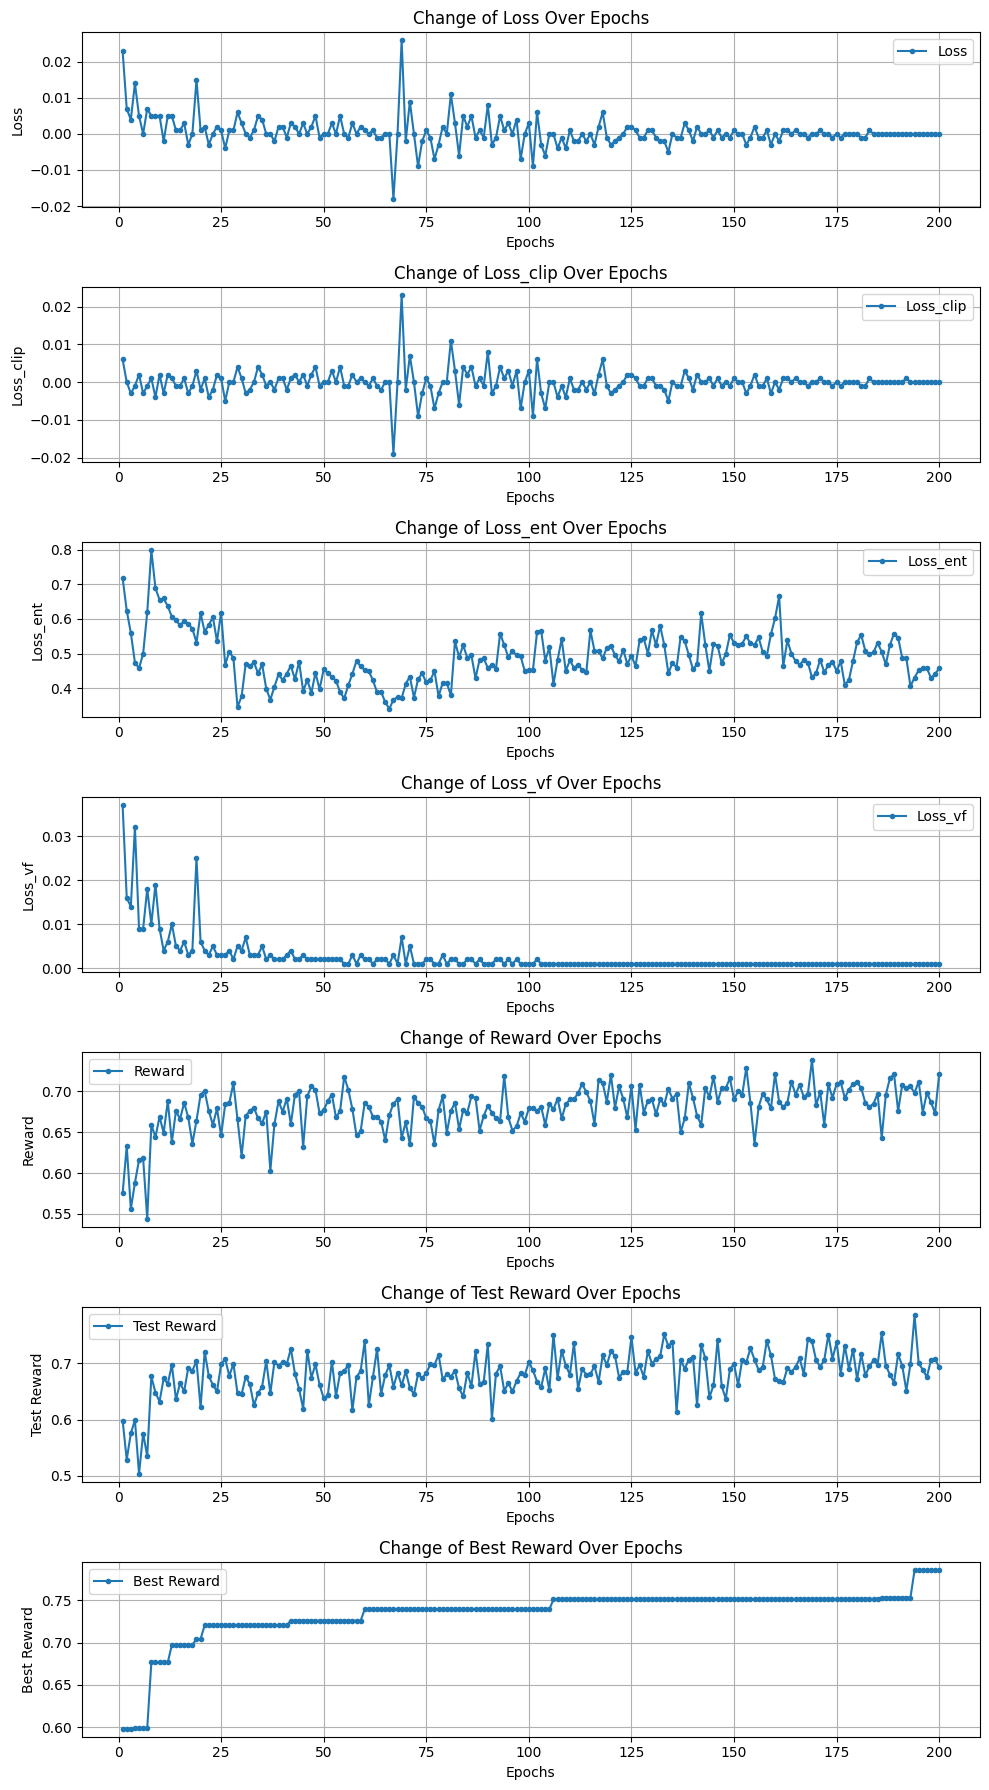

In [23]:
# Create Subplots Layout

# Set up a figure with three subplots
fig1, axs1 = plt.subplots(7, 1, figsize=(10, 18))

# Plot Loss
axs1[0].plot(epochs, losses, label="Loss", marker=".")
axs1[0].set_xlabel("Epochs")
axs1[0].set_ylabel("Loss")
axs1[0].set_title("Change of Loss Over Epochs")
axs1[0].legend()
axs1[0].grid()

axs1[1].plot(epochs, losses_clip, label="Loss_clip", marker=".")
axs1[1].set_xlabel("Epochs")
axs1[1].set_ylabel("Loss_clip")
axs1[1].set_title("Change of Loss_clip Over Epochs")
axs1[1].legend()
axs1[1].grid()

axs1[2].plot(epochs, losses_ent, label="Loss_ent", marker=".")
axs1[2].set_xlabel("Epochs")
axs1[2].set_ylabel("Loss_ent")
axs1[2].set_title("Change of Loss_ent Over Epochs")
axs1[2].legend()
axs1[2].grid()

axs1[3].plot(epochs, losses_vf, label="Loss_vf", marker=".")
axs1[3].set_xlabel("Epochs")
axs1[3].set_ylabel("Loss_vf")
axs1[3].set_title("Change of Loss_vf Over Epochs")
axs1[3].legend()
axs1[3].grid()

axs1[4].plot(epochs, rewards, label="Reward", marker=".")
axs1[4].set_xlabel("Epochs")
axs1[4].set_ylabel("Reward")
axs1[4].set_title("Change of Reward Over Epochs")
axs1[4].legend()
axs1[4].grid()

# Plot Test Reward
axs1[5].plot(epochs, test_rewards, label="Test Reward", marker=".")
axs1[5].set_xlabel("Epochs")
axs1[5].set_ylabel("Test Reward")
axs1[5].set_title("Change of Test Reward Over Epochs")
axs1[5].legend()
axs1[5].grid()

# Plot Best Reward
axs1[6].plot(epochs, best_rewards, label="Best Reward", marker=".")
axs1[6].set_xlabel("Epochs")
axs1[6].set_ylabel("Best Reward")
axs1[6].set_title("Change of Best Reward Over Epochs")
axs1[6].legend()
axs1[6].grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
dt='''
episode 1        =>     ratio: 0.7560   | total: 33
episode 2        =>     ratio: 0.6910   | total: 38
episode 3        =>     ratio: 0.6030   | total: 27
episode 4        =>     ratio: 0.6800   | total: 28
episode 5        =>     ratio: 0.5230   | total: 19
episode 6        =>     ratio: 0.6520   | total: 27
episode 7        =>     ratio: 0.5810   | total: 17
episode 8        =>     ratio: 0.7210   | total: 33
episode 9        =>     ratio: 0.7610   | total: 21
episode 10       =>     ratio: 0.6980   | total: 25
episode 11       =>     ratio: 0.6350   | total: 31
episode 12       =>     ratio: 0.7860   | total: 29
episode 13       =>     ratio: 0.6510   | total: 28
episode 14       =>     ratio: 0.7080   | total: 25
episode 15       =>     ratio: 0.6560   | total: 20
episode 16       =>     ratio: 0.7020   | total: 31
episode 17       =>     ratio: 0.6430   | total: 30
episode 18       =>     ratio: 0.7410   | total: 34
episode 19       =>     ratio: 0.5720   | total: 22
episode 20       =>     ratio: 0.7690   | total: 25
episode 21       =>     ratio: 0.7550   | total: 29
episode 22       =>     ratio: 0.6980   | total: 22
episode 23       =>     ratio: 0.7230   | total: 35
episode 24       =>     ratio: 0.7240   | total: 32
episode 25       =>     ratio: 0.6530   | total: 24
episode 26       =>     ratio: 0.6040   | total: 24
episode 27       =>     ratio: 0.7050   | total: 22
episode 28       =>     ratio: 0.5390   | total: 22
episode 29       =>     ratio: 0.7540   | total: 28
episode 30       =>     ratio: 0.7460   | total: 34
episode 31       =>     ratio: 0.7370   | total: 23
episode 32       =>     ratio: 0.5660   | total: 24
episode 33       =>     ratio: 0.7380   | total: 30
episode 34       =>     ratio: 0.6130   | total: 16
episode 35       =>     ratio: 0.6900   | total: 28
episode 36       =>     ratio: 0.8030   | total: 22
episode 37       =>     ratio: 0.5260   | total: 24
episode 38       =>     ratio: 0.6780   | total: 24
episode 39       =>     ratio: 0.7430   | total: 34
episode 40       =>     ratio: 0.7670   | total: 23
episode 41       =>     ratio: 0.6390   | total: 22
episode 42       =>     ratio: 0.7940   | total: 27
episode 43       =>     ratio: 0.7470   | total: 34
episode 44       =>     ratio: 0.7850   | total: 36
episode 45       =>     ratio: 0.5170   | total: 21
episode 46       =>     ratio: 0.7100   | total: 28
episode 47       =>     ratio: 0.7330   | total: 30
episode 48       =>     ratio: 0.6870   | total: 28
episode 49       =>     ratio: 0.8090   | total: 31
episode 50       =>     ratio: 0.6760   | total: 22
episode 51       =>     ratio: 0.7790   | total: 31
episode 52       =>     ratio: 0.7230   | total: 20
episode 53       =>     ratio: 0.6250   | total: 21
episode 54       =>     ratio: 0.6740   | total: 32
episode 55       =>     ratio: 0.5360   | total: 22
episode 56       =>     ratio: 0.6730   | total: 23
episode 57       =>     ratio: 0.5870   | total: 21
episode 58       =>     ratio: 0.8220   | total: 33
episode 59       =>     ratio: 0.5500   | total: 24
episode 60       =>     ratio: 0.5070   | total: 21
episode 61       =>     ratio: 0.7100   | total: 29
episode 62       =>     ratio: 0.6760   | total: 29
episode 63       =>     ratio: 0.7120   | total: 28
episode 64       =>     ratio: 0.7540   | total: 26
episode 65       =>     ratio: 0.8880   | total: 49
episode 66       =>     ratio: 0.5550   | total: 25
episode 67       =>     ratio: 0.7600   | total: 31
episode 68       =>     ratio: 0.7140   | total: 37
episode 69       =>     ratio: 0.5920   | total: 29
episode 70       =>     ratio: 0.6480   | total: 25
episode 71       =>     ratio: 0.7340   | total: 31
episode 72       =>     ratio: 0.7940   | total: 38
episode 73       =>     ratio: 0.7550   | total: 30
episode 74       =>     ratio: 0.7400   | total: 33
episode 75       =>     ratio: 0.6180   | total: 17
episode 76       =>     ratio: 0.7200   | total: 33
episode 77       =>     ratio: 0.8330   | total: 28
episode 78       =>     ratio: 0.6830   | total: 28
episode 79       =>     ratio: 0.7370   | total: 34
episode 80       =>     ratio: 0.6690   | total: 24
episode 81       =>     ratio: 0.7240   | total: 18
episode 82       =>     ratio: 0.5870   | total: 24
episode 83       =>     ratio: 0.7900   | total: 43
episode 84       =>     ratio: 0.8240   | total: 24
episode 85       =>     ratio: 0.7110   | total: 25
episode 86       =>     ratio: 0.5840   | total: 23
episode 87       =>     ratio: 0.7170   | total: 20
episode 88       =>     ratio: 0.7160   | total: 26
episode 89       =>     ratio: 0.5510   | total: 19
episode 90       =>     ratio: 0.7630   | total: 29
episode 91       =>     ratio: 0.5330   | total: 18
episode 92       =>     ratio: 0.8270   | total: 35
episode 93       =>     ratio: 0.6500   | total: 30
episode 94       =>     ratio: 0.7290   | total: 26
episode 95       =>     ratio: 0.6720   | total: 31
episode 96       =>     ratio: 0.7330   | total: 29
episode 97       =>     ratio: 0.6540   | total: 26
episode 98       =>     ratio: 0.6370   | total: 22
episode 99       =>     ratio: 0.7120   | total: 32
episode 100      =>     ratio: 0.6530   | total: 32
episode 101      =>     ratio: 0.6160   | total: 27
episode 102      =>     ratio: 0.6920   | total: 23
episode 103      =>     ratio: 0.7470   | total: 26
episode 104      =>     ratio: 0.6340   | total: 27
episode 105      =>     ratio: 0.7290   | total: 21
episode 106      =>     ratio: 0.7010   | total: 24
episode 107      =>     ratio: 0.7570   | total: 30
episode 108      =>     ratio: 0.7380   | total: 23
episode 109      =>     ratio: 0.6610   | total: 20
episode 110      =>     ratio: 0.7010   | total: 27
episode 111      =>     ratio: 0.5470   | total: 17
episode 112      =>     ratio: 0.6640   | total: 24
episode 113      =>     ratio: 0.6770   | total: 30
episode 114      =>     ratio: 0.7650   | total: 41
episode 115      =>     ratio: 0.7000   | total: 25
episode 116      =>     ratio: 0.7470   | total: 23
episode 117      =>     ratio: 0.6770   | total: 26
episode 118      =>     ratio: 0.5770   | total: 22
episode 119      =>     ratio: 0.7780   | total: 36
episode 120      =>     ratio: 0.6700   | total: 27
episode 121      =>     ratio: 0.8350   | total: 26
episode 122      =>     ratio: 0.7310   | total: 23
episode 123      =>     ratio: 0.6590   | total: 26
episode 124      =>     ratio: 0.7490   | total: 32
episode 125      =>     ratio: 0.5860   | total: 20
episode 126      =>     ratio: 0.5530   | total: 20
episode 127      =>     ratio: 0.7120   | total: 26
episode 128      =>     ratio: 0.6880   | total: 29
episode 129      =>     ratio: 0.7670   | total: 34
episode 130      =>     ratio: 0.5650   | total: 18
episode 131      =>     ratio: 0.6580   | total: 15
episode 132      =>     ratio: 0.5420   | total: 18
episode 133      =>     ratio: 0.6390   | total: 29
episode 134      =>     ratio: 0.6790   | total: 20
episode 135      =>     ratio: 0.7090   | total: 23
episode 136      =>     ratio: 0.6650   | total: 24
episode 137      =>     ratio: 0.7830   | total: 26
episode 138      =>     ratio: 0.7520   | total: 42
episode 139      =>     ratio: 0.7800   | total: 32
episode 140      =>     ratio: 0.6950   | total: 31
episode 141      =>     ratio: 0.6630   | total: 25
episode 142      =>     ratio: 0.6970   | total: 32
episode 143      =>     ratio: 0.6360   | total: 29
episode 144      =>     ratio: 0.7370   | total: 29
episode 145      =>     ratio: 0.5770   | total: 23
episode 146      =>     ratio: 0.5790   | total: 18
episode 147      =>     ratio: 0.8260   | total: 35
episode 148      =>     ratio: 0.8420   | total: 35
episode 149      =>     ratio: 0.7520   | total: 29
episode 150      =>     ratio: 0.6940   | total: 32
episode 151      =>     ratio: 0.5830   | total: 25
episode 152      =>     ratio: 0.6830   | total: 27
episode 153      =>     ratio: 0.6320   | total: 18
episode 154      =>     ratio: 0.7190   | total: 32
episode 155      =>     ratio: 0.6170   | total: 25
episode 156      =>     ratio: 0.7850   | total: 28
episode 157      =>     ratio: 0.8280   | total: 28
episode 158      =>     ratio: 0.7250   | total: 27
episode 159      =>     ratio: 0.6250   | total: 26
episode 160      =>     ratio: 0.7340   | total: 37
episode 161      =>     ratio: 0.6660   | total: 31
episode 162      =>     ratio: 0.6640   | total: 24
episode 163      =>     ratio: 0.7870   | total: 25
episode 164      =>     ratio: 0.7200   | total: 24
episode 165      =>     ratio: 0.7820   | total: 39
episode 166      =>     ratio: 0.7420   | total: 31
episode 167      =>     ratio: 0.7070   | total: 31
episode 168      =>     ratio: 0.6970   | total: 22
episode 169      =>     ratio: 0.6180   | total: 24
episode 170      =>     ratio: 0.8060   | total: 26
episode 171      =>     ratio: 0.5070   | total: 21
episode 172      =>     ratio: 0.7550   | total: 33
episode 173      =>     ratio: 0.7420   | total: 31
episode 174      =>     ratio: 0.6670   | total: 24
episode 175      =>     ratio: 0.7280   | total: 18
episode 176      =>     ratio: 0.5810   | total: 26
episode 177      =>     ratio: 0.4830   | total: 15
episode 178      =>     ratio: 0.6200   | total: 22
episode 179      =>     ratio: 0.7520   | total: 25
episode 180      =>     ratio: 0.6600   | total: 27
episode 181      =>     ratio: 0.5590   | total: 16
episode 182      =>     ratio: 0.7820   | total: 25
episode 183      =>     ratio: 0.7780   | total: 23
episode 184      =>     ratio: 0.6560   | total: 21
episode 185      =>     ratio: 0.7270   | total: 22
episode 186      =>     ratio: 0.7960   | total: 37
episode 187      =>     ratio: 0.8800   | total: 38
episode 188      =>     ratio: 0.7570   | total: 25
episode 189      =>     ratio: 0.6520   | total: 18
episode 190      =>     ratio: 0.8030   | total: 37
episode 191      =>     ratio: 0.7810   | total: 29
episode 192      =>     ratio: 0.7670   | total: 22
episode 193      =>     ratio: 0.6270   | total: 31
episode 194      =>     ratio: 0.8380   | total: 25
episode 195      =>     ratio: 0.7660   | total: 32
episode 196      =>     ratio: 0.7670   | total: 28
episode 197      =>     ratio: 0.7350   | total: 27
episode 198      =>     ratio: 0.8000   | total: 27
episode 199      =>     ratio: 0.7930   | total: 35
episode 200      =>     ratio: 0.6310   | total: 28
episode 201      =>     ratio: 0.6590   | total: 29
episode 202      =>     ratio: 0.7370   | total: 24
episode 203      =>     ratio: 0.6850   | total: 29
episode 204      =>     ratio: 0.7300   | total: 19
episode 205      =>     ratio: 0.6680   | total: 24
episode 206      =>     ratio: 0.7470   | total: 28
episode 207      =>     ratio: 0.7050   | total: 16
episode 208      =>     ratio: 0.6300   | total: 23
episode 209      =>     ratio: 0.6710   | total: 35
episode 210      =>     ratio: 0.7900   | total: 24
episode 211      =>     ratio: 0.7590   | total: 38
episode 212      =>     ratio: 0.7550   | total: 27
episode 213      =>     ratio: 0.8450   | total: 29
episode 214      =>     ratio: 0.7880   | total: 26
episode 215      =>     ratio: 0.6980   | total: 22
episode 216      =>     ratio: 0.8720   | total: 29
episode 217      =>     ratio: 0.7200   | total: 33
episode 218      =>     ratio: 0.6740   | total: 35
episode 219      =>     ratio: 0.6540   | total: 21
episode 220      =>     ratio: 0.6710   | total: 24
episode 221      =>     ratio: 0.6890   | total: 38
episode 222      =>     ratio: 0.7480   | total: 19
episode 223      =>     ratio: 0.4290   | total: 20
episode 224      =>     ratio: 0.6840   | total: 24
episode 225      =>     ratio: 0.7010   | total: 34
episode 226      =>     ratio: 0.6510   | total: 28
episode 227      =>     ratio: 0.7200   | total: 25
episode 228      =>     ratio: 0.8220   | total: 36
episode 229      =>     ratio: 0.6330   | total: 26
episode 230      =>     ratio: 0.6420   | total: 28
episode 231      =>     ratio: 0.6860   | total: 30
episode 232      =>     ratio: 0.7450   | total: 29
episode 233      =>     ratio: 0.7240   | total: 25
episode 234      =>     ratio: 0.6680   | total: 28
episode 235      =>     ratio: 0.7210   | total: 28
episode 236      =>     ratio: 0.7250   | total: 31
episode 237      =>     ratio: 0.7370   | total: 32
episode 238      =>     ratio: 0.6720   | total: 34
episode 239      =>     ratio: 0.8390   | total: 34
episode 240      =>     ratio: 0.7170   | total: 34
episode 241      =>     ratio: 0.6690   | total: 18
episode 242      =>     ratio: 0.7460   | total: 20
episode 243      =>     ratio: 0.6980   | total: 26
episode 244      =>     ratio: 0.6660   | total: 27
episode 245      =>     ratio: 0.7990   | total: 37
episode 246      =>     ratio: 0.7770   | total: 26
episode 247      =>     ratio: 0.7530   | total: 24
episode 248      =>     ratio: 0.7720   | total: 28
episode 249      =>     ratio: 0.6650   | total: 25
episode 250      =>     ratio: 0.8000   | total: 26
episode 251      =>     ratio: 0.7010   | total: 24
episode 252      =>     ratio: 0.7300   | total: 36
episode 253      =>     ratio: 0.7040   | total: 24
episode 254      =>     ratio: 0.7170   | total: 31
episode 255      =>     ratio: 0.6920   | total: 29
episode 256      =>     ratio: 0.6650   | total: 22
episode 257      =>     ratio: 0.7470   | total: 28
episode 258      =>     ratio: 0.8320   | total: 30
episode 259      =>     ratio: 0.8150   | total: 42
episode 260      =>     ratio: 0.7630   | total: 36
episode 261      =>     ratio: 0.6220   | total: 32
episode 262      =>     ratio: 0.6330   | total: 26
episode 263      =>     ratio: 0.6540   | total: 28
episode 264      =>     ratio: 0.5600   | total: 19
episode 265      =>     ratio: 0.6580   | total: 24
episode 266      =>     ratio: 0.5930   | total: 25
episode 267      =>     ratio: 0.6540   | total: 22
episode 268      =>     ratio: 0.5440   | total: 29
episode 269      =>     ratio: 0.6790   | total: 28
episode 270      =>     ratio: 0.5050   | total: 26
episode 271      =>     ratio: 0.7150   | total: 25
episode 272      =>     ratio: 0.7330   | total: 27
episode 273      =>     ratio: 0.7070   | total: 33
episode 274      =>     ratio: 0.6300   | total: 33
episode 275      =>     ratio: 0.7790   | total: 33
episode 276      =>     ratio: 0.7600   | total: 26
episode 277      =>     ratio: 0.7300   | total: 22
episode 278      =>     ratio: 0.6030   | total: 22
episode 279      =>     ratio: 0.7350   | total: 27
episode 280      =>     ratio: 0.7290   | total: 25
episode 281      =>     ratio: 0.6880   | total: 31
episode 282      =>     ratio: 0.6450   | total: 24
episode 283      =>     ratio: 0.7350   | total: 29
episode 284      =>     ratio: 0.6740   | total: 26
episode 285      =>     ratio: 0.6330   | total: 29
episode 286      =>     ratio: 0.7770   | total: 29
episode 287      =>     ratio: 0.7390   | total: 26
episode 288      =>     ratio: 0.8070   | total: 34
episode 289      =>     ratio: 0.6030   | total: 21
episode 290      =>     ratio: 0.6620   | total: 26
episode 291      =>     ratio: 0.7050   | total: 37
episode 292      =>     ratio: 0.7310   | total: 30
episode 293      =>     ratio: 0.6570   | total: 24
episode 294      =>     ratio: 0.5240   | total: 24
episode 295      =>     ratio: 0.8450   | total: 35
episode 296      =>     ratio: 0.8090   | total: 33
episode 297      =>     ratio: 0.8320   | total: 39
episode 298      =>     ratio: 0.5610   | total: 20
episode 299      =>     ratio: 0.5430   | total: 19
episode 300      =>     ratio: 0.7530   | total: 33
episode 301      =>     ratio: 0.7210   | total: 26
episode 302      =>     ratio: 0.7780   | total: 23
episode 303      =>     ratio: 0.6720   | total: 27
episode 304      =>     ratio: 0.7440   | total: 32
episode 305      =>     ratio: 0.7970   | total: 29
episode 306      =>     ratio: 0.7590   | total: 32
episode 307      =>     ratio: 0.7410   | total: 29
episode 308      =>     ratio: 0.7510   | total: 25
episode 309      =>     ratio: 0.7920   | total: 25
episode 310      =>     ratio: 0.7270   | total: 27
episode 311      =>     ratio: 0.6000   | total: 25
episode 312      =>     ratio: 0.7590   | total: 32
episode 313      =>     ratio: 0.7180   | total: 29
episode 314      =>     ratio: 0.6950   | total: 27
episode 315      =>     ratio: 0.7110   | total: 32
episode 316      =>     ratio: 0.7520   | total: 38
episode 317      =>     ratio: 0.6570   | total: 26
episode 318      =>     ratio: 0.6070   | total: 22
episode 319      =>     ratio: 0.6680   | total: 20
episode 320      =>     ratio: 0.6620   | total: 27
episode 321      =>     ratio: 0.7580   | total: 28
episode 322      =>     ratio: 0.7210   | total: 32
episode 323      =>     ratio: 0.6820   | total: 32
episode 324      =>     ratio: 0.6540   | total: 26
episode 325      =>     ratio: 0.5670   | total: 28
episode 326      =>     ratio: 0.7540   | total: 25
episode 327      =>     ratio: 0.8350   | total: 31
episode 328      =>     ratio: 0.5900   | total: 32
episode 329      =>     ratio: 0.6700   | total: 26
episode 330      =>     ratio: 0.6620   | total: 26
episode 331      =>     ratio: 0.5800   | total: 20
episode 332      =>     ratio: 0.7320   | total: 35
episode 333      =>     ratio: 0.7890   | total: 33
episode 334      =>     ratio: 0.5460   | total: 23
episode 335      =>     ratio: 0.5050   | total: 20
episode 336      =>     ratio: 0.8130   | total: 31
episode 337      =>     ratio: 0.6760   | total: 29
episode 338      =>     ratio: 0.6150   | total: 19
episode 339      =>     ratio: 0.7050   | total: 25
episode 340      =>     ratio: 0.7080   | total: 28
episode 341      =>     ratio: 0.5280   | total: 20
episode 342      =>     ratio: 0.6750   | total: 29
episode 343      =>     ratio: 0.6980   | total: 37
episode 344      =>     ratio: 0.6450   | total: 22
episode 345      =>     ratio: 0.8050   | total: 21
episode 346      =>     ratio: 0.7190   | total: 27
episode 347      =>     ratio: 0.7920   | total: 28
episode 348      =>     ratio: 0.6410   | total: 34
episode 349      =>     ratio: 0.7530   | total: 21
episode 350      =>     ratio: 0.8300   | total: 31
episode 351      =>     ratio: 0.7110   | total: 28
episode 352      =>     ratio: 0.6850   | total: 31
episode 353      =>     ratio: 0.7890   | total: 35
episode 354      =>     ratio: 0.6730   | total: 27
episode 355      =>     ratio: 0.5440   | total: 23
episode 356      =>     ratio: 0.7580   | total: 25
episode 357      =>     ratio: 0.8830   | total: 24
episode 358      =>     ratio: 0.6160   | total: 16
episode 359      =>     ratio: 0.7240   | total: 20
episode 360      =>     ratio: 0.5970   | total: 17
episode 361      =>     ratio: 0.7270   | total: 29
episode 362      =>     ratio: 0.6700   | total: 21
episode 363      =>     ratio: 0.6420   | total: 19
episode 364      =>     ratio: 0.6750   | total: 27
episode 365      =>     ratio: 0.6690   | total: 29
episode 366      =>     ratio: 0.5230   | total: 29
episode 367      =>     ratio: 0.7900   | total: 33
episode 368      =>     ratio: 0.7150   | total: 28
episode 369      =>     ratio: 0.7690   | total: 31
episode 370      =>     ratio: 0.8720   | total: 32
episode 371      =>     ratio: 0.7280   | total: 26
episode 372      =>     ratio: 0.6160   | total: 28
episode 373      =>     ratio: 0.8300   | total: 37
episode 374      =>     ratio: 0.7140   | total: 27
episode 375      =>     ratio: 0.5840   | total: 26
episode 376      =>     ratio: 0.6540   | total: 27
episode 377      =>     ratio: 0.7780   | total: 21
episode 378      =>     ratio: 0.7210   | total: 32
episode 379      =>     ratio: 0.5720   | total: 25
episode 380      =>     ratio: 0.7350   | total: 28
episode 381      =>     ratio: 0.6620   | total: 29
episode 382      =>     ratio: 0.7860   | total: 43
episode 383      =>     ratio: 0.7700   | total: 24
episode 384      =>     ratio: 0.7130   | total: 26
episode 385      =>     ratio: 0.6690   | total: 20
episode 386      =>     ratio: 0.7360   | total: 30
episode 387      =>     ratio: 0.6420   | total: 22
episode 388      =>     ratio: 0.7960   | total: 25
episode 389      =>     ratio: 0.7280   | total: 23
episode 390      =>     ratio: 0.5540   | total: 28
episode 391      =>     ratio: 0.6730   | total: 26
episode 392      =>     ratio: 0.7140   | total: 37
episode 393      =>     ratio: 0.7440   | total: 25
episode 394      =>     ratio: 0.7640   | total: 25
episode 395      =>     ratio: 0.8350   | total: 38
episode 396      =>     ratio: 0.7830   | total: 32
episode 397      =>     ratio: 0.5720   | total: 18
episode 398      =>     ratio: 0.8800   | total: 25
episode 399      =>     ratio: 0.7550   | total: 38
episode 400      =>     ratio: 0.7300   | total: 31
episode 401      =>     ratio: 0.7800   | total: 31
episode 402      =>     ratio: 0.5490   | total: 21
episode 403      =>     ratio: 0.7300   | total: 28
episode 404      =>     ratio: 0.4920   | total: 17
episode 405      =>     ratio: 0.7310   | total: 31
episode 406      =>     ratio: 0.7290   | total: 30
episode 407      =>     ratio: 0.7660   | total: 34
episode 408      =>     ratio: 0.6160   | total: 21
episode 409      =>     ratio: 0.7120   | total: 26
episode 410      =>     ratio: 0.6380   | total: 36
episode 411      =>     ratio: 0.7440   | total: 36
episode 412      =>     ratio: 0.7560   | total: 30
episode 413      =>     ratio: 0.7160   | total: 34
episode 414      =>     ratio: 0.6030   | total: 32
episode 415      =>     ratio: 0.7370   | total: 27
episode 416      =>     ratio: 0.7630   | total: 22
episode 417      =>     ratio: 0.6540   | total: 23
episode 418      =>     ratio: 0.6870   | total: 26
episode 419      =>     ratio: 0.7560   | total: 30
episode 420      =>     ratio: 0.6180   | total: 24
episode 421      =>     ratio: 0.5930   | total: 20
episode 422      =>     ratio: 0.7000   | total: 30
episode 423      =>     ratio: 0.7620   | total: 30
episode 424      =>     ratio: 0.6770   | total: 23
episode 425      =>     ratio: 0.7120   | total: 33
episode 426      =>     ratio: 0.6610   | total: 27
episode 427      =>     ratio: 0.7590   | total: 37
episode 428      =>     ratio: 0.7790   | total: 39
episode 429      =>     ratio: 0.6930   | total: 22
episode 430      =>     ratio: 0.7180   | total: 27
episode 431      =>     ratio: 0.7740   | total: 21
episode 432      =>     ratio: 0.7710   | total: 38
episode 433      =>     ratio: 0.7850   | total: 29
episode 434      =>     ratio: 0.5810   | total: 19
episode 435      =>     ratio: 0.6100   | total: 19
episode 436      =>     ratio: 0.6610   | total: 22
episode 437      =>     ratio: 0.8390   | total: 33
episode 438      =>     ratio: 0.6830   | total: 25
episode 439      =>     ratio: 0.7390   | total: 26
episode 440      =>     ratio: 0.8030   | total: 29
episode 441      =>     ratio: 0.7490   | total: 31
episode 442      =>     ratio: 0.5690   | total: 23
episode 443      =>     ratio: 0.6680   | total: 28
episode 444      =>     ratio: 0.6060   | total: 24
episode 445      =>     ratio: 0.5940   | total: 24
episode 446      =>     ratio: 0.6930   | total: 26
episode 447      =>     ratio: 0.6260   | total: 30
episode 448      =>     ratio: 0.7750   | total: 31
episode 449      =>     ratio: 0.6620   | total: 29
episode 450      =>     ratio: 0.6960   | total: 22
episode 451      =>     ratio: 0.7650   | total: 29
episode 452      =>     ratio: 0.7070   | total: 25
episode 453      =>     ratio: 0.6000   | total: 18
episode 454      =>     ratio: 0.7640   | total: 30
episode 455      =>     ratio: 0.6720   | total: 29
episode 456      =>     ratio: 0.7210   | total: 33
episode 457      =>     ratio: 0.7640   | total: 23
episode 458      =>     ratio: 0.7740   | total: 39
episode 459      =>     ratio: 0.6910   | total: 27
episode 460      =>     ratio: 0.7050   | total: 21
episode 461      =>     ratio: 0.7470   | total: 29
episode 462      =>     ratio: 0.6610   | total: 30
episode 463      =>     ratio: 0.5790   | total: 23
episode 464      =>     ratio: 0.7110   | total: 30
episode 465      =>     ratio: 0.7790   | total: 25
episode 466      =>     ratio: 0.7140   | total: 22
episode 467      =>     ratio: 0.7870   | total: 30
episode 468      =>     ratio: 0.6920   | total: 24
episode 469      =>     ratio: 0.4780   | total: 17
episode 470      =>     ratio: 0.8460   | total: 28
episode 471      =>     ratio: 0.7080   | total: 37
episode 472      =>     ratio: 0.4970   | total: 24
episode 473      =>     ratio: 0.7110   | total: 33
episode 474      =>     ratio: 0.6100   | total: 22
episode 475      =>     ratio: 0.7090   | total: 23
episode 476      =>     ratio: 0.7340   | total: 29
episode 477      =>     ratio: 0.8170   | total: 34
episode 478      =>     ratio: 0.7110   | total: 28
episode 479      =>     ratio: 0.7280   | total: 22
episode 480      =>     ratio: 0.5370   | total: 14
episode 481      =>     ratio: 0.7330   | total: 35
episode 482      =>     ratio: 0.7600   | total: 32
episode 483      =>     ratio: 0.6580   | total: 26
episode 484      =>     ratio: 0.6840   | total: 28
episode 485      =>     ratio: 0.6220   | total: 30
episode 486      =>     ratio: 0.6960   | total: 21
episode 487      =>     ratio: 0.6620   | total: 23
episode 488      =>     ratio: 0.6270   | total: 16
episode 489      =>     ratio: 0.5590   | total: 23
episode 490      =>     ratio: 0.5710   | total: 20
episode 491      =>     ratio: 0.6300   | total: 23
episode 492      =>     ratio: 0.7760   | total: 21
episode 493      =>     ratio: 0.6840   | total: 17
episode 494      =>     ratio: 0.7450   | total: 36
episode 495      =>     ratio: 0.7070   | total: 30
episode 496      =>     ratio: 0.7590   | total: 29
episode 497      =>     ratio: 0.6370   | total: 28
episode 498      =>     ratio: 0.7400   | total: 31
episode 499      =>     ratio: 0.6950   | total: 30
episode 500      =>     ratio: 0.4980   | total: 21
episode 501      =>     ratio: 0.7480   | total: 29
episode 502      =>     ratio: 0.7070   | total: 25
episode 503      =>     ratio: 0.7610   | total: 27
episode 504      =>     ratio: 0.7380   | total: 28
episode 505      =>     ratio: 0.7800   | total: 34
episode 506      =>     ratio: 0.6050   | total: 28
episode 507      =>     ratio: 0.7210   | total: 25
episode 508      =>     ratio: 0.6440   | total: 28
episode 509      =>     ratio: 0.5930   | total: 21
episode 510      =>     ratio: 0.7660   | total: 21
episode 511      =>     ratio: 0.8240   | total: 35
episode 512      =>     ratio: 0.7930   | total: 33
episode 513      =>     ratio: 0.6880   | total: 30
episode 514      =>     ratio: 0.7910   | total: 40
episode 515      =>     ratio: 0.6690   | total: 17
episode 516      =>     ratio: 0.6640   | total: 28
episode 517      =>     ratio: 0.8050   | total: 36
episode 518      =>     ratio: 0.6030   | total: 18
episode 519      =>     ratio: 0.5730   | total: 26
episode 520      =>     ratio: 0.7330   | total: 24
episode 521      =>     ratio: 0.6060   | total: 20
episode 522      =>     ratio: 0.8280   | total: 35
episode 523      =>     ratio: 0.6740   | total: 24
episode 524      =>     ratio: 0.6920   | total: 38
episode 525      =>     ratio: 0.6850   | total: 33
episode 526      =>     ratio: 0.4730   | total: 22
episode 527      =>     ratio: 0.8390   | total: 37
episode 528      =>     ratio: 0.7790   | total: 30
episode 529      =>     ratio: 0.7180   | total: 36
episode 530      =>     ratio: 0.7030   | total: 24
episode 531      =>     ratio: 0.4970   | total: 22
episode 532      =>     ratio: 0.6770   | total: 35
episode 533      =>     ratio: 0.6210   | total: 23
episode 534      =>     ratio: 0.4470   | total: 24
episode 535      =>     ratio: 0.7210   | total: 31
episode 536      =>     ratio: 0.7940   | total: 26
episode 537      =>     ratio: 0.6840   | total: 30
episode 538      =>     ratio: 0.7440   | total: 28
episode 539      =>     ratio: 0.7630   | total: 33
episode 540      =>     ratio: 0.7590   | total: 33
episode 541      =>     ratio: 0.6990   | total: 22
episode 542      =>     ratio: 0.7380   | total: 25
episode 543      =>     ratio: 0.8160   | total: 27
episode 544      =>     ratio: 0.7680   | total: 35
episode 545      =>     ratio: 0.7340   | total: 27
episode 546      =>     ratio: 0.5800   | total: 28
episode 547      =>     ratio: 0.5610   | total: 19
episode 548      =>     ratio: 0.7780   | total: 30
episode 549      =>     ratio: 0.7960   | total: 31
episode 550      =>     ratio: 0.8080   | total: 30
episode 551      =>     ratio: 0.7220   | total: 26
episode 552      =>     ratio: 0.6180   | total: 20
episode 553      =>     ratio: 0.6230   | total: 25
episode 554      =>     ratio: 0.8170   | total: 29
episode 555      =>     ratio: 0.6510   | total: 25
episode 556      =>     ratio: 0.5550   | total: 28
episode 557      =>     ratio: 0.6470   | total: 26
episode 558      =>     ratio: 0.7090   | total: 29
episode 559      =>     ratio: 0.8270   | total: 34
episode 560      =>     ratio: 0.6350   | total: 28
episode 561      =>     ratio: 0.7890   | total: 26
episode 562      =>     ratio: 0.8020   | total: 33
episode 563      =>     ratio: 0.6130   | total: 22
episode 564      =>     ratio: 0.6060   | total: 28
episode 565      =>     ratio: 0.6920   | total: 25
episode 566      =>     ratio: 0.8050   | total: 23
episode 567      =>     ratio: 0.8580   | total: 33
episode 568      =>     ratio: 0.4670   | total: 22
episode 569      =>     ratio: 0.6560   | total: 30
episode 570      =>     ratio: 0.6790   | total: 23
episode 571      =>     ratio: 0.7790   | total: 25
episode 572      =>     ratio: 0.6300   | total: 27
episode 573      =>     ratio: 0.6240   | total: 24
episode 574      =>     ratio: 0.6800   | total: 20
episode 575      =>     ratio: 0.7900   | total: 29
episode 576      =>     ratio: 0.6790   | total: 32
episode 577      =>     ratio: 0.6980   | total: 30
episode 578      =>     ratio: 0.7710   | total: 30
episode 579      =>     ratio: 0.7900   | total: 34
episode 580      =>     ratio: 0.7810   | total: 41
episode 581      =>     ratio: 0.7540   | total: 31
episode 582      =>     ratio: 0.6060   | total: 28
episode 583      =>     ratio: 0.7510   | total: 35
episode 584      =>     ratio: 0.6620   | total: 22
episode 585      =>     ratio: 0.7700   | total: 27
episode 586      =>     ratio: 0.7250   | total: 23
episode 587      =>     ratio: 0.6080   | total: 27
episode 588      =>     ratio: 0.6280   | total: 28
episode 589      =>     ratio: 0.8220   | total: 31
episode 590      =>     ratio: 0.7750   | total: 24
episode 591      =>     ratio: 0.6350   | total: 24
episode 592      =>     ratio: 0.7360   | total: 27
episode 593      =>     ratio: 0.6930   | total: 25
episode 594      =>     ratio: 0.7380   | total: 25
episode 595      =>     ratio: 0.6740   | total: 22
episode 596      =>     ratio: 0.6440   | total: 25
episode 597      =>     ratio: 0.7370   | total: 35
episode 598      =>     ratio: 0.6480   | total: 30
episode 599      =>     ratio: 0.7800   | total: 26
episode 600      =>     ratio: 0.7490   | total: 27
episode 601      =>     ratio: 0.8610   | total: 34
episode 602      =>     ratio: 0.7080   | total: 22
episode 603      =>     ratio: 0.5980   | total: 22
episode 604      =>     ratio: 0.6500   | total: 28
episode 605      =>     ratio: 0.6590   | total: 22
episode 606      =>     ratio: 0.7800   | total: 30
episode 607      =>     ratio: 0.7740   | total: 32
episode 608      =>     ratio: 0.7550   | total: 33
episode 609      =>     ratio: 0.7260   | total: 29
episode 610      =>     ratio: 0.6520   | total: 21
episode 611      =>     ratio: 0.6270   | total: 26
episode 612      =>     ratio: 0.7440   | total: 30
episode 613      =>     ratio: 0.7000   | total: 20
episode 614      =>     ratio: 0.6060   | total: 24
episode 615      =>     ratio: 0.7480   | total: 27
episode 616      =>     ratio: 0.6170   | total: 20
episode 617      =>     ratio: 0.7150   | total: 27
episode 618      =>     ratio: 0.6160   | total: 36
episode 619      =>     ratio: 0.7630   | total: 31
episode 620      =>     ratio: 0.7070   | total: 27
episode 621      =>     ratio: 0.7830   | total: 16
episode 622      =>     ratio: 0.7640   | total: 29
episode 623      =>     ratio: 0.8500   | total: 32
episode 624      =>     ratio: 0.7580   | total: 19
episode 625      =>     ratio: 0.6680   | total: 30
episode 626      =>     ratio: 0.7870   | total: 27
episode 627      =>     ratio: 0.5210   | total: 18
episode 628      =>     ratio: 0.8450   | total: 37
episode 629      =>     ratio: 0.6870   | total: 36
episode 630      =>     ratio: 0.7060   | total: 23
episode 631      =>     ratio: 0.7360   | total: 35
episode 632      =>     ratio: 0.7470   | total: 23
episode 633      =>     ratio: 0.6010   | total: 24
episode 634      =>     ratio: 0.7050   | total: 29
episode 635      =>     ratio: 0.6700   | total: 31
episode 636      =>     ratio: 0.7060   | total: 23
episode 637      =>     ratio: 0.5930   | total: 24
episode 638      =>     ratio: 0.8020   | total: 25
episode 639      =>     ratio: 0.7520   | total: 23
episode 640      =>     ratio: 0.6880   | total: 30
episode 641      =>     ratio: 0.7320   | total: 28
episode 642      =>     ratio: 0.7710   | total: 30
episode 643      =>     ratio: 0.8050   | total: 32
episode 644      =>     ratio: 0.6890   | total: 32
episode 645      =>     ratio: 0.6250   | total: 22
episode 646      =>     ratio: 0.6720   | total: 26
episode 647      =>     ratio: 0.8060   | total: 18
episode 648      =>     ratio: 0.7380   | total: 32
episode 649      =>     ratio: 0.7990   | total: 32
episode 650      =>     ratio: 0.7530   | total: 32
episode 651      =>     ratio: 0.7750   | total: 25
episode 652      =>     ratio: 0.5180   | total: 29
episode 653      =>     ratio: 0.6310   | total: 24
episode 654      =>     ratio: 0.8550   | total: 30
episode 655      =>     ratio: 0.7630   | total: 23
episode 656      =>     ratio: 0.6170   | total: 26
episode 657      =>     ratio: 0.6450   | total: 25
episode 658      =>     ratio: 0.7050   | total: 21
episode 659      =>     ratio: 0.6810   | total: 33
episode 660      =>     ratio: 0.7260   | total: 33
episode 661      =>     ratio: 0.6100   | total: 22
episode 662      =>     ratio: 0.6870   | total: 25
episode 663      =>     ratio: 0.6170   | total: 29
episode 664      =>     ratio: 0.7640   | total: 32
episode 665      =>     ratio: 0.7570   | total: 34
episode 666      =>     ratio: 0.6230   | total: 20
episode 667      =>     ratio: 0.8210   | total: 37
episode 668      =>     ratio: 0.7200   | total: 22
episode 669      =>     ratio: 0.7920   | total: 38
episode 670      =>     ratio: 0.7270   | total: 32
episode 671      =>     ratio: 0.7670   | total: 36
episode 672      =>     ratio: 0.6570   | total: 29
episode 673      =>     ratio: 0.6530   | total: 28
episode 674      =>     ratio: 0.6040   | total: 16
episode 675      =>     ratio: 0.6340   | total: 24
episode 676      =>     ratio: 0.7340   | total: 37
episode 677      =>     ratio: 0.6140   | total: 19
episode 678      =>     ratio: 0.7990   | total: 30
episode 679      =>     ratio: 0.7450   | total: 24
episode 680      =>     ratio: 0.6050   | total: 26
episode 681      =>     ratio: 0.6300   | total: 21
episode 682      =>     ratio: 0.8120   | total: 35
episode 683      =>     ratio: 0.6980   | total: 23
episode 684      =>     ratio: 0.7860   | total: 31
episode 685      =>     ratio: 0.6700   | total: 31
episode 686      =>     ratio: 0.7760   | total: 21
episode 687      =>     ratio: 0.6600   | total: 29
episode 688      =>     ratio: 0.7600   | total: 25
episode 689      =>     ratio: 0.7070   | total: 19
episode 690      =>     ratio: 0.7460   | total: 20
episode 691      =>     ratio: 0.7610   | total: 37
episode 692      =>     ratio: 0.7130   | total: 27
episode 693      =>     ratio: 0.7280   | total: 29
episode 694      =>     ratio: 0.6900   | total: 27
episode 695      =>     ratio: 0.7510   | total: 28
episode 696      =>     ratio: 0.6830   | total: 32
episode 697      =>     ratio: 0.5870   | total: 26
episode 698      =>     ratio: 0.8140   | total: 29
episode 699      =>     ratio: 0.7290   | total: 27
episode 700      =>     ratio: 0.6060   | total: 28
episode 701      =>     ratio: 0.7840   | total: 32
episode 702      =>     ratio: 0.7740   | total: 29
episode 703      =>     ratio: 0.7150   | total: 22
episode 704      =>     ratio: 0.7380   | total: 25
episode 705      =>     ratio: 0.7400   | total: 32
episode 706      =>     ratio: 0.5760   | total: 17
episode 707      =>     ratio: 0.7010   | total: 24
episode 708      =>     ratio: 0.7620   | total: 30
episode 709      =>     ratio: 0.6430   | total: 25
episode 710      =>     ratio: 0.6290   | total: 35
episode 711      =>     ratio: 0.7490   | total: 28
episode 712      =>     ratio: 0.6300   | total: 32
episode 713      =>     ratio: 0.7650   | total: 27
episode 714      =>     ratio: 0.7090   | total: 31
episode 715      =>     ratio: 0.7800   | total: 35
episode 716      =>     ratio: 0.7670   | total: 28
episode 717      =>     ratio: 0.6410   | total: 24
episode 718      =>     ratio: 0.7130   | total: 36
episode 719      =>     ratio: 0.7160   | total: 37
episode 720      =>     ratio: 0.8040   | total: 27
episode 721      =>     ratio: 0.6860   | total: 27
episode 722      =>     ratio: 0.7230   | total: 27
episode 723      =>     ratio: 0.6760   | total: 20
episode 724      =>     ratio: 0.7220   | total: 26
episode 725      =>     ratio: 0.7690   | total: 29
episode 726      =>     ratio: 0.7270   | total: 31
episode 727      =>     ratio: 0.5870   | total: 16
episode 728      =>     ratio: 0.6750   | total: 29
episode 729      =>     ratio: 0.6040   | total: 23
episode 730      =>     ratio: 0.7340   | total: 23
episode 731      =>     ratio: 0.7660   | total: 29
episode 732      =>     ratio: 0.6920   | total: 29
episode 733      =>     ratio: 0.4440   | total: 21
episode 734      =>     ratio: 0.6220   | total: 20
episode 735      =>     ratio: 0.6740   | total: 29
episode 736      =>     ratio: 0.7820   | total: 31
episode 737      =>     ratio: 0.7990   | total: 31
episode 738      =>     ratio: 0.7120   | total: 31
episode 739      =>     ratio: 0.7310   | total: 25
episode 740      =>     ratio: 0.6410   | total: 20
episode 741      =>     ratio: 0.6310   | total: 31
episode 742      =>     ratio: 0.7400   | total: 20
episode 743      =>     ratio: 0.6320   | total: 28
episode 744      =>     ratio: 0.7410   | total: 24
episode 745      =>     ratio: 0.7500   | total: 27
episode 746      =>     ratio: 0.7410   | total: 25
episode 747      =>     ratio: 0.6970   | total: 23
episode 748      =>     ratio: 0.6740   | total: 29
episode 749      =>     ratio: 0.5760   | total: 23
episode 750      =>     ratio: 0.5900   | total: 24
episode 751      =>     ratio: 0.7220   | total: 24
episode 752      =>     ratio: 0.5870   | total: 21
episode 753      =>     ratio: 0.6250   | total: 26
episode 754      =>     ratio: 0.7750   | total: 21
episode 755      =>     ratio: 0.6170   | total: 22
episode 756      =>     ratio: 0.6850   | total: 27
episode 757      =>     ratio: 0.7080   | total: 25
episode 758      =>     ratio: 0.7500   | total: 32
episode 759      =>     ratio: 0.6260   | total: 21
episode 760      =>     ratio: 0.6580   | total: 26
episode 761      =>     ratio: 0.6750   | total: 30
episode 762      =>     ratio: 0.6850   | total: 24
episode 763      =>     ratio: 0.5830   | total: 32
episode 764      =>     ratio: 0.7720   | total: 32
episode 765      =>     ratio: 0.7640   | total: 23
episode 766      =>     ratio: 0.7810   | total: 33
episode 767      =>     ratio: 0.8230   | total: 30
episode 768      =>     ratio: 0.6980   | total: 35
episode 769      =>     ratio: 0.6970   | total: 32
episode 770      =>     ratio: 0.5740   | total: 23
episode 771      =>     ratio: 0.7910   | total: 28
episode 772      =>     ratio: 0.6730   | total: 31
episode 773      =>     ratio: 0.7400   | total: 39
episode 774      =>     ratio: 0.8400   | total: 34
episode 775      =>     ratio: 0.6970   | total: 31
episode 776      =>     ratio: 0.6580   | total: 27
episode 777      =>     ratio: 0.6230   | total: 27
episode 778      =>     ratio: 0.7420   | total: 36
episode 779      =>     ratio: 0.8190   | total: 32
episode 780      =>     ratio: 0.6010   | total: 26
episode 781      =>     ratio: 0.7780   | total: 33
episode 782      =>     ratio: 0.7240   | total: 27
episode 783      =>     ratio: 0.7910   | total: 35
episode 784      =>     ratio: 0.5760   | total: 22
episode 785      =>     ratio: 0.6740   | total: 20
episode 786      =>     ratio: 0.7310   | total: 32
episode 787      =>     ratio: 0.6710   | total: 27
episode 788      =>     ratio: 0.7070   | total: 30
episode 789      =>     ratio: 0.6490   | total: 28
episode 790      =>     ratio: 0.8000   | total: 35
episode 791      =>     ratio: 0.5810   | total: 26
episode 792      =>     ratio: 0.7880   | total: 34
episode 793      =>     ratio: 0.8030   | total: 28
episode 794      =>     ratio: 0.6510   | total: 25
episode 795      =>     ratio: 0.7550   | total: 26
episode 796      =>     ratio: 0.6860   | total: 26
episode 797      =>     ratio: 0.7800   | total: 31
episode 798      =>     ratio: 0.7340   | total: 34
episode 799      =>     ratio: 0.7350   | total: 36
episode 800      =>     ratio: 0.7440   | total: 25
episode 801      =>     ratio: 0.8140   | total: 30
episode 802      =>     ratio: 0.7680   | total: 30
episode 803      =>     ratio: 0.6430   | total: 16
episode 804      =>     ratio: 0.6200   | total: 28
episode 805      =>     ratio: 0.7150   | total: 25
episode 806      =>     ratio: 0.7270   | total: 24
episode 807      =>     ratio: 0.7250   | total: 28
episode 808      =>     ratio: 0.4460   | total: 21
episode 809      =>     ratio: 0.6510   | total: 26
episode 810      =>     ratio: 0.6050   | total: 24
episode 811      =>     ratio: 0.7950   | total: 32
episode 812      =>     ratio: 0.6920   | total: 21
episode 813      =>     ratio: 0.7130   | total: 28
episode 814      =>     ratio: 0.5990   | total: 21
episode 815      =>     ratio: 0.5000   | total: 22
episode 816      =>     ratio: 0.7070   | total: 21
episode 817      =>     ratio: 0.7380   | total: 27
episode 818      =>     ratio: 0.6350   | total: 24
episode 819      =>     ratio: 0.6840   | total: 27
episode 820      =>     ratio: 0.7660   | total: 20
episode 821      =>     ratio: 0.8390   | total: 29
episode 822      =>     ratio: 0.7750   | total: 29
episode 823      =>     ratio: 0.7120   | total: 28
episode 824      =>     ratio: 0.6710   | total: 30
episode 825      =>     ratio: 0.7960   | total: 40
episode 826      =>     ratio: 0.7850   | total: 37
episode 827      =>     ratio: 0.7310   | total: 37
episode 828      =>     ratio: 0.7340   | total: 33
episode 829      =>     ratio: 0.5670   | total: 27
episode 830      =>     ratio: 0.6230   | total: 22
episode 831      =>     ratio: 0.6560   | total: 20
episode 832      =>     ratio: 0.6000   | total: 28
episode 833      =>     ratio: 0.7600   | total: 37
episode 834      =>     ratio: 0.6260   | total: 30
episode 835      =>     ratio: 0.6480   | total: 17
episode 836      =>     ratio: 0.7350   | total: 25
episode 837      =>     ratio: 0.7100   | total: 32
episode 838      =>     ratio: 0.7350   | total: 27
episode 839      =>     ratio: 0.7210   | total: 32
episode 840      =>     ratio: 0.4750   | total: 14
episode 841      =>     ratio: 0.5650   | total: 24
episode 842      =>     ratio: 0.7730   | total: 38
episode 843      =>     ratio: 0.7170   | total: 30
episode 844      =>     ratio: 0.4990   | total: 22
episode 845      =>     ratio: 0.7980   | total: 42
episode 846      =>     ratio: 0.5390   | total: 26
episode 847      =>     ratio: 0.7120   | total: 29
episode 848      =>     ratio: 0.6370   | total: 22
episode 849      =>     ratio: 0.8560   | total: 36
episode 850      =>     ratio: 0.7040   | total: 26
episode 851      =>     ratio: 0.7650   | total: 30
episode 852      =>     ratio: 0.7970   | total: 33
episode 853      =>     ratio: 0.6460   | total: 27
episode 854      =>     ratio: 0.6210   | total: 27
episode 855      =>     ratio: 0.6520   | total: 24
episode 856      =>     ratio: 0.6840   | total: 24
episode 857      =>     ratio: 0.7990   | total: 25
episode 858      =>     ratio: 0.7180   | total: 25
episode 859      =>     ratio: 0.8310   | total: 35
episode 860      =>     ratio: 0.8160   | total: 26
episode 861      =>     ratio: 0.7300   | total: 22
episode 862      =>     ratio: 0.6320   | total: 30
episode 863      =>     ratio: 0.7420   | total: 32
episode 864      =>     ratio: 0.7680   | total: 31
episode 865      =>     ratio: 0.6010   | total: 16
episode 866      =>     ratio: 0.6540   | total: 26
episode 867      =>     ratio: 0.7960   | total: 25
episode 868      =>     ratio: 0.5110   | total: 14
episode 869      =>     ratio: 0.7510   | total: 25
episode 870      =>     ratio: 0.8390   | total: 33
episode 871      =>     ratio: 0.6300   | total: 25
episode 872      =>     ratio: 0.6570   | total: 30
episode 873      =>     ratio: 0.6800   | total: 32
episode 874      =>     ratio: 0.7490   | total: 36
episode 875      =>     ratio: 0.6140   | total: 34
episode 876      =>     ratio: 0.8040   | total: 29
episode 877      =>     ratio: 0.7700   | total: 34
episode 878      =>     ratio: 0.6300   | total: 24
episode 879      =>     ratio: 0.7090   | total: 29
episode 880      =>     ratio: 0.6270   | total: 27
episode 881      =>     ratio: 0.6580   | total: 34
episode 882      =>     ratio: 0.6920   | total: 21
episode 883      =>     ratio: 0.7110   | total: 29
episode 884      =>     ratio: 0.7060   | total: 29
episode 885      =>     ratio: 0.7640   | total: 33
episode 886      =>     ratio: 0.6060   | total: 26
episode 887      =>     ratio: 0.8250   | total: 28
episode 888      =>     ratio: 0.8130   | total: 29
episode 889      =>     ratio: 0.5850   | total: 22
episode 890      =>     ratio: 0.6310   | total: 13
episode 891      =>     ratio: 0.6750   | total: 26
episode 892      =>     ratio: 0.7890   | total: 26
episode 893      =>     ratio: 0.7330   | total: 31
episode 894      =>     ratio: 0.6670   | total: 17
episode 895      =>     ratio: 0.7950   | total: 30
episode 896      =>     ratio: 0.8040   | total: 35
episode 897      =>     ratio: 0.7400   | total: 28
episode 898      =>     ratio: 0.8430   | total: 39
episode 899      =>     ratio: 0.6270   | total: 20
episode 900      =>     ratio: 0.7200   | total: 35
episode 901      =>     ratio: 0.7330   | total: 35
episode 902      =>     ratio: 0.8020   | total: 20
episode 903      =>     ratio: 0.8060   | total: 37
episode 904      =>     ratio: 0.7330   | total: 23
episode 905      =>     ratio: 0.7600   | total: 24
episode 906      =>     ratio: 0.6790   | total: 28
episode 907      =>     ratio: 0.7820   | total: 32
episode 908      =>     ratio: 0.7530   | total: 29
episode 909      =>     ratio: 0.6290   | total: 20
episode 910      =>     ratio: 0.7250   | total: 31
episode 911      =>     ratio: 0.7260   | total: 37
episode 912      =>     ratio: 0.6320   | total: 22
episode 913      =>     ratio: 0.7680   | total: 29
episode 914      =>     ratio: 0.8050   | total: 23
episode 915      =>     ratio: 0.7920   | total: 23
episode 916      =>     ratio: 0.7640   | total: 27
episode 917      =>     ratio: 0.7170   | total: 28
episode 918      =>     ratio: 0.7750   | total: 36
episode 919      =>     ratio: 0.7130   | total: 29
episode 920      =>     ratio: 0.8110   | total: 35
episode 921      =>     ratio: 0.7390   | total: 37
episode 922      =>     ratio: 0.6660   | total: 26
episode 923      =>     ratio: 0.7760   | total: 28
episode 924      =>     ratio: 0.6550   | total: 22
episode 925      =>     ratio: 0.7140   | total: 31
episode 926      =>     ratio: 0.7430   | total: 32
episode 927      =>     ratio: 0.7920   | total: 36
episode 928      =>     ratio: 0.7760   | total: 37
episode 929      =>     ratio: 0.6860   | total: 30
episode 930      =>     ratio: 0.6610   | total: 28
episode 931      =>     ratio: 0.6990   | total: 26
episode 932      =>     ratio: 0.7650   | total: 24
episode 933      =>     ratio: 0.7860   | total: 29
episode 934      =>     ratio: 0.7180   | total: 29
episode 935      =>     ratio: 0.7800   | total: 21
episode 936      =>     ratio: 0.7890   | total: 33
episode 937      =>     ratio: 0.6940   | total: 28
episode 938      =>     ratio: 0.7360   | total: 35
episode 939      =>     ratio: 0.6820   | total: 23
episode 940      =>     ratio: 0.7260   | total: 34
episode 941      =>     ratio: 0.6430   | total: 26
episode 942      =>     ratio: 0.7640   | total: 24
episode 943      =>     ratio: 0.7630   | total: 19
episode 944      =>     ratio: 0.6650   | total: 15
episode 945      =>     ratio: 0.7970   | total: 31
episode 946      =>     ratio: 0.7260   | total: 32
episode 947      =>     ratio: 0.6620   | total: 27
episode 948      =>     ratio: 0.6610   | total: 28
episode 949      =>     ratio: 0.7670   | total: 25
episode 950      =>     ratio: 0.7490   | total: 33
episode 951      =>     ratio: 0.7020   | total: 30
episode 952      =>     ratio: 0.8050   | total: 38
episode 953      =>     ratio: 0.7260   | total: 20
episode 954      =>     ratio: 0.6200   | total: 25
episode 955      =>     ratio: 0.6470   | total: 29
episode 956      =>     ratio: 0.8050   | total: 34
episode 957      =>     ratio: 0.7280   | total: 29
episode 958      =>     ratio: 0.8280   | total: 35
episode 959      =>     ratio: 0.6580   | total: 29
episode 960      =>     ratio: 0.6140   | total: 18
episode 961      =>     ratio: 0.6210   | total: 23
episode 962      =>     ratio: 0.7000   | total: 25
episode 963      =>     ratio: 0.7020   | total: 23
episode 964      =>     ratio: 0.8140   | total: 33
episode 965      =>     ratio: 0.6940   | total: 24
episode 966      =>     ratio: 0.6780   | total: 28
episode 967      =>     ratio: 0.7020   | total: 27
episode 968      =>     ratio: 0.6950   | total: 29
episode 969      =>     ratio: 0.7590   | total: 29
episode 970      =>     ratio: 0.6500   | total: 28
episode 971      =>     ratio: 0.7040   | total: 35
episode 972      =>     ratio: 0.5350   | total: 21
episode 973      =>     ratio: 0.8130   | total: 36
episode 974      =>     ratio: 0.8200   | total: 38
episode 975      =>     ratio: 0.7070   | total: 27
episode 976      =>     ratio: 0.7680   | total: 36
episode 977      =>     ratio: 0.8400   | total: 31
episode 978      =>     ratio: 0.7120   | total: 27
episode 979      =>     ratio: 0.8040   | total: 32
episode 980      =>     ratio: 0.6990   | total: 32
episode 981      =>     ratio: 0.5970   | total: 22
episode 982      =>     ratio: 0.7330   | total: 31
episode 983      =>     ratio: 0.7660   | total: 25
episode 984      =>     ratio: 0.7720   | total: 24
episode 985      =>     ratio: 0.7850   | total: 29
episode 986      =>     ratio: 0.7520   | total: 36
episode 987      =>     ratio: 0.6960   | total: 28
episode 988      =>     ratio: 0.8270   | total: 33
episode 989      =>     ratio: 0.7070   | total: 21
episode 990      =>     ratio: 0.7530   | total: 36
episode 991      =>     ratio: 0.6890   | total: 24
episode 992      =>     ratio: 0.6150   | total: 16
episode 993      =>     ratio: 0.6730   | total: 26
episode 994      =>     ratio: 0.7780   | total: 32
episode 995      =>     ratio: 0.5670   | total: 22
episode 996      =>     ratio: 0.6970   | total: 32
episode 997      =>     ratio: 0.6820   | total: 24
episode 998      =>     ratio: 0.7690   | total: 31
episode 999      =>     ratio: 0.6970   | total: 34
episode 1000     =>     ratio: 0.6160   | total: 22
'''

In [32]:
# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
ratio_pattern = r"ratio: ([\d.]+)"
total_pattern = r"total: ([\d.]+)"


# Extract values using regex patterns
ratios = re.findall(ratio_pattern, dt)
totals = re.findall(total_pattern, dt)

# Convert extracted values to float
ratios = list(map(float, ratios))
totals = list(map(float, totals))


# Print extracted values for verification
print(ratios)
print(totals)

# Define epochs based on the number of extracted values
epochs = list(range(1, len(ratios) + 1))

import numpy as np

# Calculating mean and standard deviation
mean_ratio = np.mean(ratios)
std_ratio = np.std(ratios)
print(f"Mean of Ratios: {mean_ratio}",f"\nStandard Deviation of Ratios: {std_ratio}")

mean_total = np.mean(totals)
std_total = np.std(totals)
print(f"Mean of Totals: {mean_total}",f"\nStandard Deviation of Totals: {std_total}")

[0.756, 0.691, 0.603, 0.68, 0.523, 0.652, 0.581, 0.721, 0.761, 0.698, 0.635, 0.786, 0.651, 0.708, 0.656, 0.702, 0.643, 0.741, 0.572, 0.769, 0.755, 0.698, 0.723, 0.724, 0.653, 0.604, 0.705, 0.539, 0.754, 0.746, 0.737, 0.566, 0.738, 0.613, 0.69, 0.803, 0.526, 0.678, 0.743, 0.767, 0.639, 0.794, 0.747, 0.785, 0.517, 0.71, 0.733, 0.687, 0.809, 0.676, 0.779, 0.723, 0.625, 0.674, 0.536, 0.673, 0.587, 0.822, 0.55, 0.507, 0.71, 0.676, 0.712, 0.754, 0.888, 0.555, 0.76, 0.714, 0.592, 0.648, 0.734, 0.794, 0.755, 0.74, 0.618, 0.72, 0.833, 0.683, 0.737, 0.669, 0.724, 0.587, 0.79, 0.824, 0.711, 0.584, 0.717, 0.716, 0.551, 0.763, 0.533, 0.827, 0.65, 0.729, 0.672, 0.733, 0.654, 0.637, 0.712, 0.653, 0.616, 0.692, 0.747, 0.634, 0.729, 0.701, 0.757, 0.738, 0.661, 0.701, 0.547, 0.664, 0.677, 0.765, 0.7, 0.747, 0.677, 0.577, 0.778, 0.67, 0.835, 0.731, 0.659, 0.749, 0.586, 0.553, 0.712, 0.688, 0.767, 0.565, 0.658, 0.542, 0.639, 0.679, 0.709, 0.665, 0.783, 0.752, 0.78, 0.695, 0.663, 0.697, 0.636, 0.737, 0.577

In [26]:
import re
import numpy as np

# Dữ liệu log (giả sử lưu trong file log.txt hoặc chuỗi string)
log_file = "log.txt"

# Mẫu regex để lọc dòng chứa thông tin quan trọng
pattern = re.compile(r"Epoch #\d+: \d+it.*|Epoch #\d+: test_reward: .*")

# Đọc file log và lọc dòng mong muốn
with open(log_file, "r", encoding="utf-8") as file:
    filtered_lines = [line.strip() for line in file if pattern.search(line)]

log_data = "\n".join(filtered_lines)

import re

# Dữ liệu log (giả sử lưu trong file log.txt hoặc chuỗi string)
log_file2 = "log copy.txt"

# Mẫu regex để lọc dòng chứa thông tin quan trọng
pattern2 = re.compile(r"Epoch #\d+: \d+it.*|Epoch #\d+: test_reward: .*")

# Đọc file log và lọc dòng mong muốn
with open(log_file2, "r", encoding="utf-8") as file:
    filtered_lines2 = [line.strip() for line in file if pattern.search(line)]

log_data2 = "\n".join(filtered_lines2)

import re

# Loại bỏ phần "xxx.xs xx " ở đầu dòng test_reward
cleaned_log = re.sub(r"\d+\.\ds\s+\d+\s+", "", log_data)
cleaned_log2 = re.sub(r"\d+\.\ds\s+\d+\s+", "", log_data2)
# Import Libraries and Data

import re
import matplotlib.pyplot as plt

# Input data
data = cleaned_log + cleaned_log2

# Extract Values with Regex

# Define regex patterns to extract loss, test_reward, and best_reward values
loss_pattern = r"loss=(-?\d+\.?\d*)"
loss_clip_pattern = r"loss/clip=(-?\d+\.?\d*)"
loss_ent_pattern = r"loss/ent=(-?\d+\.?\d*)"
loss_vf_pattern = r"loss/vf=(-?\d+\.?\d*)"
reward_pattern = r"rew=([\d.]+)"
test_reward_pattern = r"test_reward: ([\d.]+)"
best_reward_pattern = r"best_reward: ([\d.]+)"

# Extract values using regex patterns
losses = re.findall(loss_pattern, data)
losses_clip = re.findall(loss_clip_pattern, data)
losses_ent = re.findall(loss_ent_pattern, data)
losses_vf = re.findall(loss_vf_pattern, data)
reward = re.findall(reward_pattern, data)
test_rewards = re.findall(test_reward_pattern, data)
best_rewards = re.findall(best_reward_pattern, data)

# Convert extracted values to float
losses = list(map(float, losses))
losses_clip = list(map(float, losses_clip))
losses_ent = list(map(float, losses_ent))
losses_vf = list(map(float, losses_vf))
reward = list(map(float, reward))
test_rewards = list(map(float, test_rewards))
best_rewards = list(map(float, best_rewards))

# Print extracted values for verification
print(losses)
print(losses_clip)
print(losses_ent)
print(losses_vf)
print(reward)
print(test_rewards)
print(best_rewards)


# Define epochs based on the number of extracted values
epochs = list(range(1, len(losses_clip) + 1))


window_size = 5
padding_size = 2



padded_data = np.pad(test_rewards, (2, 2), mode='edge')

# Tính trung bình 5 phần tử kề nhau
results = np.convolve(padded_data, np.ones(5)/5, mode='valid')


[0.014, 0.01, 0.005, 0.009, 0.016, 0.005, 0.012, 0.004, 0.014, 0.029, 0.006, 0.004, 0.003, 0.006, 0.003, 0.004, 0.001, 0.002, 0.002, 0.005, 0.005, 0.004, 0.001, 0.003, 0.002, 0.03, 0.006, 0.001, 0.001, 0.001, 0.021, 0.028, 0.002, 0.001, 0.0, 0.0, 0.008, 0.001, -0.0, -0.0, 0.001, -0.001, 0.001, -0.001, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.01, 0.0, 0.0, -0.0, 0.0, -0.0, 0.001, 0.002, 0.001, 0.009, -0.0, 0.01, 0.01, 0.016, 0.0, 0.007, -0.001, -0.001, 0.001, -0.001, -0.001, -0.0, -0.001, -0.001, -0.0, -0.001, -0.001, -0.0, 0.001, -0.001, -0.0, -0.001, -0.001, -0.001, -0.001, -0.0, -0.001, -0.0, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.0, -0.0, -0.001, -0.0, -0.0, -0.001, -0.0, 0.0, -0.001, 0.012, -0.001, -0.001, -0.001, -0.001, 0.001, -0.0, -0.0, 0.001, -0.0, -0.0, -0.0, -0.001, 0.002, 0.0, -0.0, -0.001, -0.001, -0.001, 0.007, -0.001, -0.0, -0.0, 0.002, 0.001, 0.026, -0.0, -0.001, -0.0, -0.001, -0.001, -0.0, -0.001, -0.001, -0.0, -0.0, -0.001,

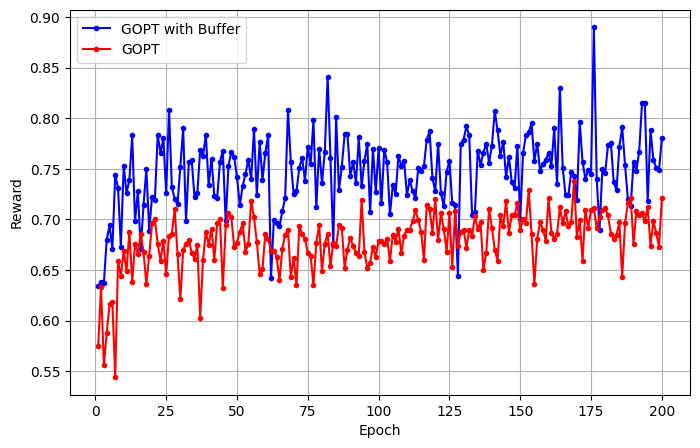

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, reward, label='GOPT with Buffer', color='blue', marker=".")  # Đường màu xanh
plt.plot(epochs, rewards, label='GOPT', color='red', marker=".")  # Đường màu đỏ

# Thiết lập tiêu đề và nhãn
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.legend()  # Hiển thị chú thích
plt.grid(True)  # Bật lưới

# Hiển thị biểu đồ
plt.show()